In [1]:
!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 

/bin/sh: pip: command not found


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC

from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from mlxtend.plotting import plot_decision_regions

from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import plot_tree



pd.set_option('display.max_columns', None)

In [49]:
df = pd.read_pickle('df_all_recent3.pkl')

In [536]:
#df.to_csv('all_churn_data.csv', index=False)

In [50]:
# maybe get more granular with the popular products

sns.set(font_scale=1.3)

In [5]:
df.head()

,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber optic,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_group,monthly_group,total_group,tenure_Dev_tenure_group,monthlycharges_Dev_monthly_group,est_total_charge_Dev_total_group,monthlycharges_Dev_tenure_group,est_total_charge_Dev_tenure_group,tenure_Dev_monthly_group,tenure_Dev_total_group,count_popular,count_unpopular,%_popular,%_unpopular,prod_own_group_low_products,prod_own_group_med_products,prod_own_group_most_products,prod_own_group,monthlycharges_Dev_prod_own_group,est_total_charge_Dev_prod_own_group
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,0,1,29.85,3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Tenure_shortest,Lowest_Monthly,Lowest_Total,-1.050037,1.725486,-1.145615,-0.999941,-0.909266,-1.149250,-0.865068,2,0,0.666667,0.00,1,0,0,low_products,-0.491203,-0.873376
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,0,1,1936.30,4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_medium,Low_Monthly,Low_Total,-0.424251,1.457531,-1.069528,-0.328595,-0.407661,0.482893,-0.307999,2,2,0.500000,0.50,1,0,0,low_products,0.708697,1.320536
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,1,107.70,5,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Tenure_shortest,Low_Monthly,Lowest_Total,-0.811863,0.846377,-0.990766,-0.099126,-0.663209,-0.973666,-0.810024,3,1,0.600000,0.20,0,1,0,med_products,-1.619671,-1.398823
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,0,1,1903.50,4,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_long,Low_Monthly,Low_Total,-1.440796,-1.430667,-1.134151,-0.859176,-0.993210,0.983585,0.448265,1,3,0.250000,0.75,1,0,0,low_products,0.060043,1.282790
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,1,141.40,3,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,Tenure_shortest,Mid_Monthly,Lowest_Total,-0.811863,0.220984,-0.923734,0.533322,-0.556696,-1.089959,-0.810024,3,0,1.000000,0.00,1,0,0,low_products,1.317503,-0.745006


In [169]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    
    


    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)

    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
        
        bottom, top = heatmap.get_ylim()
        heatmap.set_ylim(bottom + 0.5, top - 0.5)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

# Some EDA

In [125]:
df.shape

(7043, 65)

In [126]:
df.columns

Index(['customerid', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'monthlycharges', 'churn', 'int_service_yn',
       'est_total_charge', 'total_products', 'gender_female', 'gender_male',
       'internetservice_dsl', 'internetservice_fiber optic',
       'contract_month-to-month', 'contract_one year', 'contract_two year',
       'paymentmethod_bank transfer (automatic)',
       'paymentmethod_credit card (automatic)',
       'paymentmethod_electronic check', 'paymentmethod_mailed check',
       'tenure_group_tenure_long', 'tenure_group_tenure_longest',
       'tenure_group_tenure_medium', 'tenure_group_tenure_short',
       'tenure_group_tenure_shortest', 'monthly_bins_high_monthly',
       'monthly_bins_highest_monthly', 'monthly_bins_low_monthly',
       'monthly_bins_lowest_monthly', 'monthly_bins_mid

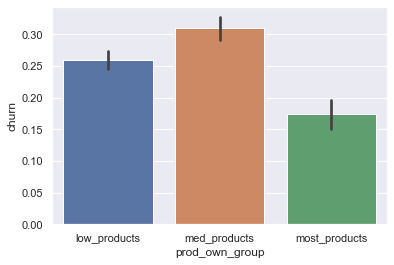

In [127]:
# more products = less

sns.barplot(df['prod_own_group'], df['churn'])

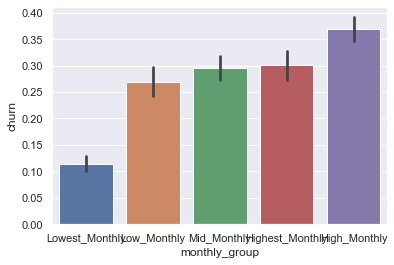

In [128]:
sns.barplot(df['monthly_group'], df['churn'])

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

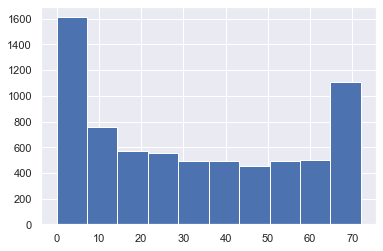

In [129]:
plt.hist(df['tenure'])

# LINEARYLY SEPERABLE?

Text(0.5, 0, '%_popular')

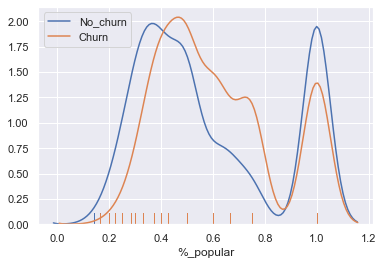

In [130]:
target_0 = df.loc[df['churn'] == 0]
target_1 = df.loc[df['churn'] == 1]

sns.distplot(target_0['%_popular'], hist=False, rug=True, label='No_churn')
sns.distplot(target_1['%_popular'], hist=False, rug=True, label = 'Churn')

plt.legend()

plt.xlabel('%_popular')

In [52]:
def linsep(var):
    # Sort the dataframe by target
    plt.figure(figsize=(8,6))
    
    target_0 = df.loc[df['churn'] == 0]
    target_1 = df.loc[df['churn'] == 1]

    sns.distplot(target_0[var], hist=False, rug=True, label='No_churn')
    sns.distplot(target_1[var], hist=False, rug=True, label = 'Churn')

    plt.legend()

    plt.xlabel(var)



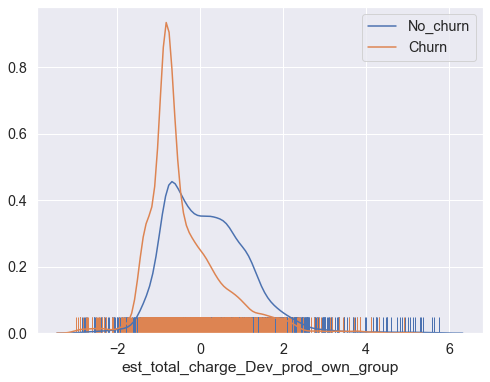

In [53]:
linsep('est_total_charge_Dev_prod_own_group')

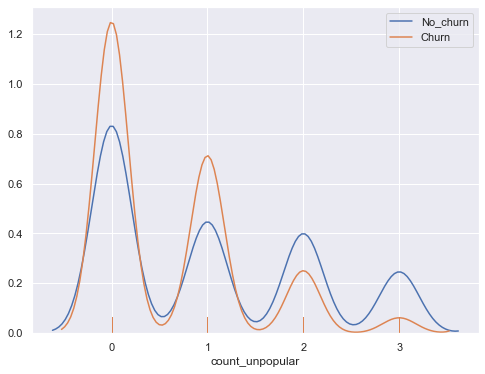

In [133]:
linsep('count_unpopular')

In [47]:
linsep('count_popular')

NameError: name 'linsep' is not defined

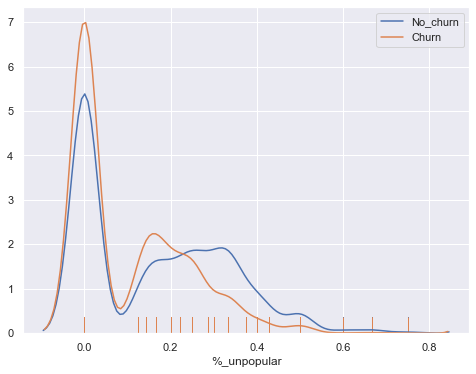

In [135]:
linsep('%_unpopular')

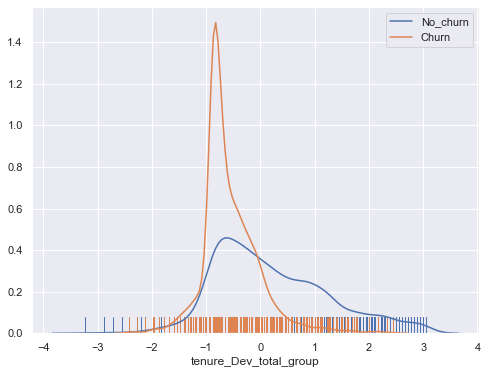

In [136]:
# WOW?

# new customers paying alot with little tenure leave early? give them discount!

linsep('tenure_Dev_total_group')

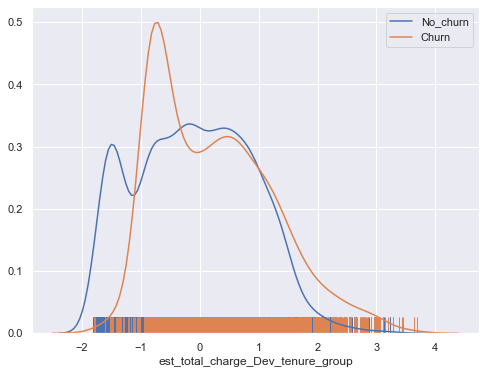

In [137]:
linsep('est_total_charge_Dev_tenure_group')

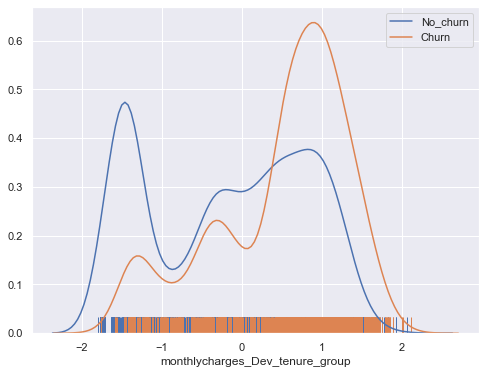

In [138]:
# ANOTHER GOOD ONE!

linsep('monthlycharges_Dev_tenure_group')

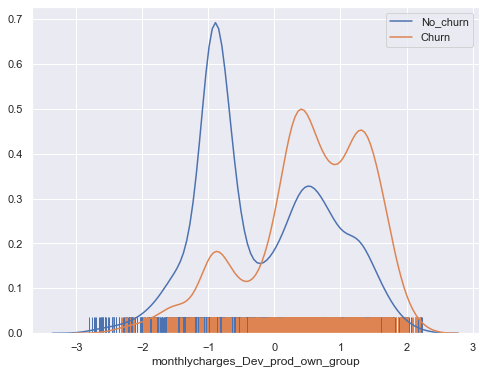

In [139]:
# ANOTHER GOOD ONE!!!

linsep('monthlycharges_Dev_prod_own_group')

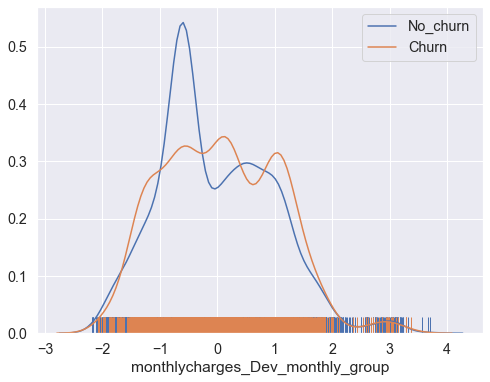

In [68]:
linsep('monthlycharges_Dev_monthly_group')

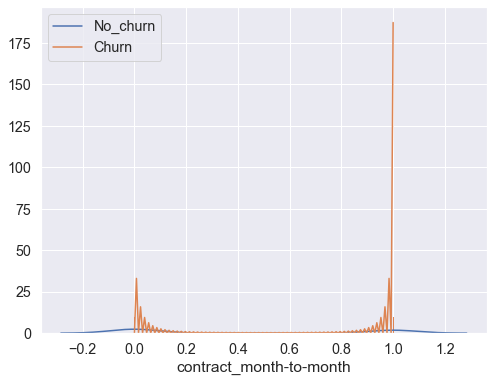

In [64]:
linsep('contract_month-to-month')

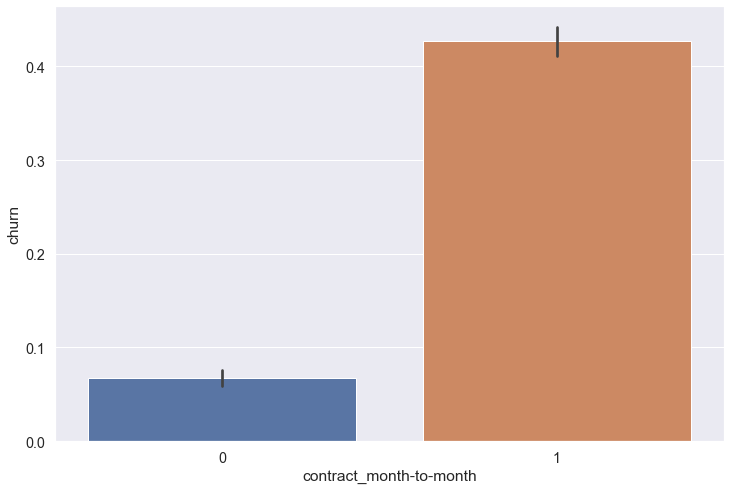

In [80]:
plt.figure(figsize=(12,8))
sns.barplot('contract_month-to-month','churn', data=df)

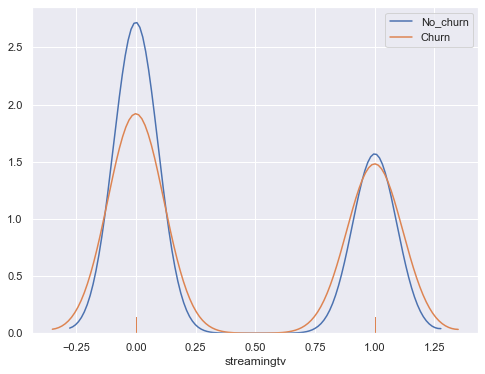

In [141]:
linsep('streamingtv')

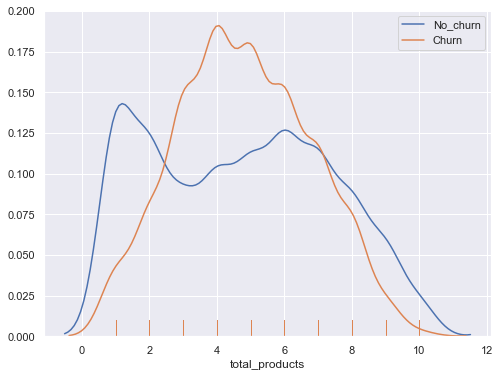

In [142]:
linsep('total_products')

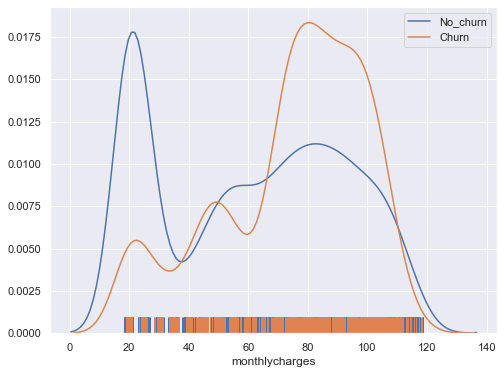

In [143]:
# Strting to think we are working linearly sepreable data

linsep('monthlycharges')

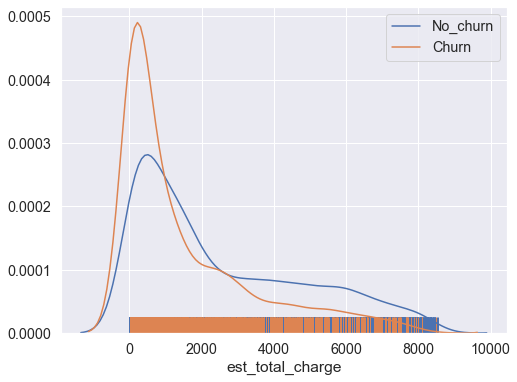

In [87]:
linsep('est_total_charge')

In [146]:
pd.set_option('display.max_rows', None)
df.dtypes

customerid                                   object
seniorcitizen                                 int64
partner                                       int64
dependents                                    int64
tenure                                        int64
phoneservice                                  int64
multiplelines                                 int64
onlinesecurity                                int64
onlinebackup                                  int64
deviceprotection                              int64
techsupport                                   int64
streamingtv                                   int64
streamingmovies                               int64
paperlessbilling                              int64
monthlycharges                              float64
churn                                         int64
int_service_yn                                int64
est_total_charge                            float64
total_products                                int64
gender_femal

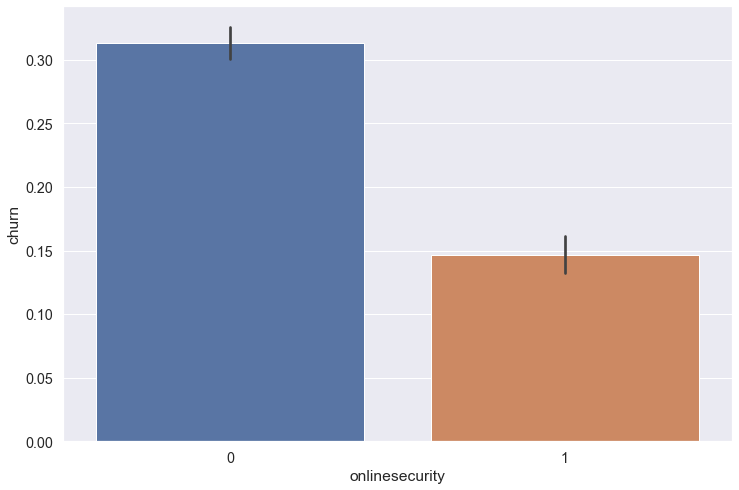

In [83]:
plt.figure(figsize=(12,8))
sns.barplot('onlinesecurity','churn', data=df)

In [158]:
X = df.drop(['customerid','churn','tenure_group','monthly_group','total_group','prod_own_group'], axis=1)
X.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber optic,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_Dev_tenure_group,monthlycharges_Dev_monthly_group,est_total_charge_Dev_total_group,monthlycharges_Dev_tenure_group,est_total_charge_Dev_tenure_group,tenure_Dev_monthly_group,tenure_Dev_total_group,count_popular,count_unpopular,%_popular,%_unpopular,prod_own_group_low_products,prod_own_group_med_products,prod_own_group_most_products,monthlycharges_Dev_prod_own_group,est_total_charge_Dev_prod_own_group
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,1,29.85,3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,-1.050037,1.725486,-1.145615,-0.999941,-0.909266,-1.149250,-0.865068,2,0,0.666667,0.00,1,0,0,-0.491203,-0.873376
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1,1936.30,4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,-0.424251,1.457531,-1.069528,-0.328595,-0.407661,0.482893,-0.307999,2,2,0.500000,0.50,1,0,0,0.708697,1.320536
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,107.70,5,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,-0.811863,0.846377,-0.990766,-0.099126,-0.663209,-0.973666,-0.810024,3,1,0.600000,0.20,0,1,0,-1.619671,-1.398823
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1,1903.50,4,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,-1.440796,-1.430667,-1.134151,-0.859176,-0.993210,0.983585,0.448265,1,3,0.250000,0.75,1,0,0,0.060043,1.282790
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,141.40,3,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,-0.811863,0.220984,-0.923734,0.533322,-0.556696,-1.089959,-0.810024,3,0,1.000000,0.00,1,0,0,1.317503,-0.745006


In [29]:
X_1= df.drop(['customerid','churn','tenure_group','monthly_group','total_group','prod_own_group'], axis=1)
y_1 = df.churn

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.25, random_state=1)

log = LogisticRegression(max_iter = 4000)
logfit = log.fit(X_train, y_train)
logpred = logfit.predict(X_test)

In [56]:
    X = df.drop(['customerid','churn','tenure_group','monthly_group','total_group','prod_own_group'], axis=1)
    y = df.churn
    
    X_train,_X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=2)

    log = LogisticRegression(max_iter=4000)
    logfit = log.fit(X_train, y_train)
    logpred = logfit.predict(X_test)
    
    log_acc = accuracy_score(y_test, logpred)

ValueError: Found input variables with inconsistent numbers of samples: [1761, 5283]

# Logistic Models

## Logistic Model - All Features Imbalanced

In [136]:
#not balanced classes yet

def logreg(data):
    
    X = data.drop(['customerid','churn','tenure_group','monthly_group','total_group','prod_own_group'], axis=1)
    y = data.churn
    
    X_train,_X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)

    log = LogisticRegression(max_iter=4000)
    logfit = log.fit(X_train, y_train)
    logpred = logfit.predict(X_test)
    #logprobas = 

    
    log_acc = accuracy_score(y_test, logpred)
    log_prec = precision_score(y_test, logpred)
    log_rec = recall_score(y_test, logpred)
    # log_pr_curve = precision_recall_curve()
  
    log_f1 = f1_score(y_test, logpred)
    log_beta = fbeta_score(y_test, logpred, beta = 2)
    
    # The F-beta score will weight toward Precision when beta 
    # is less than one. The F-beta score will weight toward 
    # Recall when beta is greater than one.
    
    print('Before handling class imbalance: \n' )
    print("log accuracy: {}".format(log_acc))
    print("log precision: {}".format(log_prec))
    print("log recall: {}".format(log_rec))
    print("log F1: {}".format(log_f1))
    print("log F1 Beta 2: {}".format(log_beta))

In [530]:
X_train,_X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)

log = LogisticRegression(max_iter=4000)
logfit = log.fit(X_train, y_train)
logpred = logfit.predict(X_test)

roc_auc_score(y_test, logfit.predict_proba(X_test)[:,1])

ValueError: Found input variables with inconsistent numbers of samples: [1761, 2587]

## Log model 1 (IMB, No Strat, all Feats)

# X and Y

In [6]:
X = df.drop(['customerid','churn','tenure_group','monthly_group','total_group','prod_own_group'], axis=1)
y = df.churn

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=40)

In [140]:
lr = LogisticRegression(max_iter = 2000)
lrfit = lr.fit(X_train, y_train)
lrpred = lrfit.predict(X_test)
accuracy_score(y_test, lrpred)

log_acc = accuracy_score(y_test, lrpred)
log_prec = precision_score(y_test, lrpred)
log_rec = recall_score(y_test, lrpred)
# log_pr_curve = precision_recall_curve()

log_f1 = f1_score(y_test, lrpred)
log_beta = fbeta_score(y_test, lrpred, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print('Before handling class imbalance: \n' )
print("log accuracy: {}".format(log_acc))
print("log precision: {}".format(log_prec))
print("log recall: {}".format(log_rec))
print("log F1: {}".format(log_f1))
print("log F1 Beta 0.5: {}".format(log_beta))

Before handling class imbalance: 

log accuracy: 0.7932992617830777
log precision: 0.6307692307692307
log recall: 0.5278969957081545
log F1: 0.5747663551401869
log F1 Beta 0.5: 0.6071076011846002


## Log model 2 Stratified

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=40)

In [532]:
lr2 = LogisticRegression(max_iter = 2000)
lrfit2 = lr2.fit(X_train, y_train)
lrpred2 = lrfit2.predict(X_test)

log_acc2 = accuracy_score(y_test, lrpred2)
log_prec2 = precision_score(y_test, lrpred2)
log_rec2 = recall_score(y_test, lrpred2)
# log_pr_curve = precision_recall_curve()

log_f12 = f1_score(y_test, lrpred2)
log_beta2 = fbeta_score(y_test, lrpred2, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print('Before handling class imbalance: \n' )
print("log accuracy: {}".format(log_acc2))
print("log precision: {}".format(log_prec2))
print("log recall: {}".format(log_rec2))
print("log F1: {}".format(log_f12))
print("log F1 Beta 0.5: {}".format(log_beta2))

Before handling class imbalance: 

log accuracy: 0.7932992617830777
log precision: 0.6307692307692307
log recall: 0.5278969957081545
log F1: 0.5747663551401869
log F1 Beta 0.5: 0.6071076011846002


In [143]:
lrfit.coef_

array([[ 1.91902710e-01, -2.31888458e-02, -1.17739799e-01,
        -4.20502828e-02, -8.32915120e-01,  1.81051063e-01,
        -1.88600688e-01, -2.64557837e-01,  8.83802698e-02,
        -1.05399331e-01,  9.92804528e-02,  8.50989627e-02,
         4.63534504e-01,  6.60752401e-03,  3.66869131e-01,
         1.79217273e-04, -1.07258593e-01, -5.80206914e-02,
        -8.55254516e-02,  1.08899939e-02,  3.55979137e-01,
         6.70041229e-01, -1.01880848e-01, -7.11706524e-01,
        -4.40190764e-02, -2.03184719e-01,  2.31925834e-01,
        -1.28268182e-01,  1.63862387e-01, -1.64928759e-02,
         1.45092768e-02, -3.73191746e-01,  6.77668150e-02,
        -8.50520580e-02,  1.82517125e-01,  6.43086671e-02,
        -1.46901867e-01, -1.58418010e-01,  1.13371155e-01,
        -1.44908568e-02,  8.80401768e-03, -1.38262549e-01,
        -1.12967909e-01, -5.07572641e-02,  2.41013748e-03,
        -6.40264708e-02,  3.61056920e-01, -1.26793895e-01,
        -1.74714343e-02,  7.98097914e-02, -2.51148538e-0

## Log Model 3 - Scaled training

In [144]:
# I think this screwed things up. Scores way down except recall. 

std_scale = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=40, stratify=y)
X_train_scaled = std_scale.fit_transform(X_train)

In [145]:
lr3 = LogisticRegression(max_iter = 2000)
lrfit3 = lr3.fit(X_train_scaled, y_train)
lrpred3 = lrfit3.predict(X_test)

log_acc3 = accuracy_score(y_test, lrpred3)
log_prec3 = precision_score(y_test, lrpred3)
log_rec3 = recall_score(y_test, lrpred3)
# log_pr_curve = precision_recall_curve()

log_f13 = f1_score(y_test, lrpred3)
log_beta3 = fbeta_score(y_test, lrpred3, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print('Before handling class imbalance: \n' )
print("log accuracy: {}".format(log_acc3))
print("log precision: {}".format(log_prec3))
print("log recall: {}".format(log_rec3))
print("log F1: {}".format(log_f13))
print("log F1 Beta 0.5: {}".format(log_beta3))

Before handling class imbalance: 

log accuracy: 0.2657580919931857
log precision: 0.26534090909090907
log recall: 1.0
log F1: 0.4193982936686124
log F1 Beta 0.5: 0.31104302650859195


In [146]:
lr3.coef_

array([[ 0.09478768,  0.03737707, -0.0547308 , -0.15712357, -0.29610764,
         0.09952087, -0.04617354, -0.13695776,  0.06363352, -0.02738442,
         0.04388407,  0.04963596,  0.09153405, -0.22738866,  0.23383039,
         0.49485892,  0.03287449, -0.00331984,  0.00331984, -0.10387474,
         0.29415135,  0.36135946,  0.01304034, -0.43352842, -0.0169991 ,
        -0.07407963,  0.11502077, -0.03892493, -0.08906668, -0.33624063,
         0.02982131,  0.00183396,  0.34048005, -0.0574968 , -0.11833986,
         0.14170686,  0.05177046, -0.01177575,  0.23300351,  0.26199688,
        -0.04039692, -0.28276562,  0.08270109, -0.22444141, -0.00884276,
        -0.02873957,  1.16617344, -0.11997736, -0.65062638,  0.27942264,
         0.07165119, -0.00303182, -0.05978504, -0.29697576,  0.35223344,
        -0.13284196, -0.30628989, -0.4972045 , -0.10038714]])

## Log model 2: ROC AUC

In [147]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

ROC AUC score =  0.8372976287139378


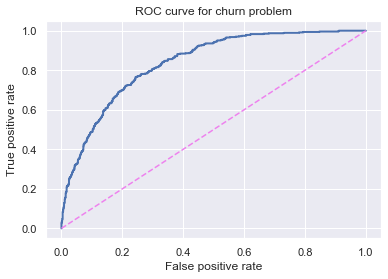

In [533]:
fpr, tpr, thresholds = roc_curve(y_test, lr2.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, lr2.predict_proba(X_test)[:,1]))

In [149]:
cm = print_confusion_matrix(confusion_matrix(y_test, lrfit2.predict(X_test)), ['Class 0', 'Class 1'])

NameError: name 'print_confusion_matrix' is not defined

In [ ]:
df.churn.value_counts()

Question 4: Do we have to worry about the class imbalance when using a ROC curve?

**Yes! Say our majority class is the negative class. If we have significant imbalance, and a very large number of actual negatives, our false positive rate (FP/TN) would still look low even when we have lots of false positives as the denominator would be very large.**

**LOG LOSS**

In [150]:
from sklearn.metrics import log_loss

In [151]:
print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, lr2.predict_proba(X_test))))

Log-loss on logit: 0.4186


In [152]:
# you attributed to the right class the probability 𝑝≈0.4186 across samples.

## LOG MODEL BALANCED - RANDOM OVER SAMPLED

In [153]:
# Now let's add some random oversampling of the minority classes

X_bal = df.drop(['customerid','churn','tenure_group','monthly_group','total_group','prod_own_group'], axis=1)
y_bal = df.churn

X_train, X_test, y_train, y_test = train_test_split(X_bal,y_bal, test_size = 0.25, random_state=40, stratify=y)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_bal,y_bal)

In [154]:
Counter(y_resampled)

Counter({0: 5174, 1: 5174})

In [155]:
lr4 = LogisticRegression(max_iter = 4000)
lrfit4 = lr4.fit(X_resampled, y_resampled)
lrpred4 = lrfit4.predict(X_test)

log_acc4 = accuracy_score(y_test, lrpred4)
log_prec4 = precision_score(y_test, lrpred4)
log_rec4 = recall_score(y_test, lrpred4)
# log_pr_curve = precision_recall_curve()

log_f14 = f1_score(y_test, lrpred4)
log_beta4 = fbeta_score(y_test, lrpred4, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print('Before handling class imbalance: \n' )
print("log accuracy: {}".format(log_acc4))
print("log precision: {}".format(log_prec4))
print("log recall: {}".format(log_rec4))
print("log F1: {}".format(log_f14))
print("log F1 Beta 0.5: {}".format(log_beta4))

Before handling class imbalance: 

log accuracy: 0.7370812038614424
log precision: 0.5026595744680851
log recall: 0.8094218415417559
log F1: 0.6201804757998359
log F1 Beta 0.5: 0.5438848920863308


ROC AUC score =  0.8468123343118794


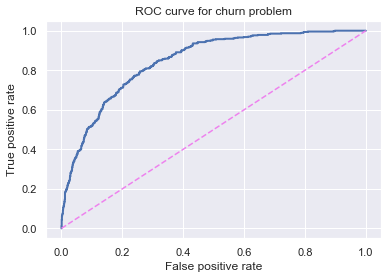

In [156]:
# Slight improvement here

fpr, tpr, thresholds = roc_curve(y_test, lr4.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, lr4.predict_proba(X_test)[:,1]))

In [157]:
cm = print_confusion_matrix(confusion_matrix(y_test, lrfit4.predict(X_test)), ['Class 0', 'Class 1'])

NameError: name 'print_confusion_matrix' is not defined

## LOG MODEL BALANCED - SMOTE OVER SAMPLED


In [158]:
from imblearn.over_sampling import SMOTE

X_smoted, y_smoted = SMOTE(random_state=40).fit_sample(X_bal,y_bal)

In [159]:
Counter(y_smoted)

Counter({0: 5174, 1: 5174})

In [160]:
lr5 = LogisticRegression(max_iter = 2000)
lrfit5 = lr5.fit(X_smoted, y_smoted)
lrpred5 = lrfit5.predict(X_test)

log_acc5 = accuracy_score(y_test, lrpred5)
log_prec5 = precision_score(y_test, lrpred5)
log_rec5 = recall_score(y_test, lrpred5)
# log_pr_curve = precision_recall_curve()

log_f15 = f1_score(y_test, lrpred5)
log_beta5 = fbeta_score(y_test, lrpred5, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print('Before handling class imbalance: \n' )
print("log accuracy: {}".format(log_acc5))
print("log precision: {}".format(log_prec5))
print("log recall: {}".format(log_rec5))
print("log F1: {}".format(log_f15))
print("log F1 Beta 0.5: {}".format(log_beta5))

Before handling class imbalance: 

log accuracy: 0.7932992617830777
log precision: 0.612691466083151
log recall: 0.5995717344753747
log F1: 0.6060606060606061
log F1 Beta 0.5: 0.6100217864923747


ROC AUC score =  0.8429566207400985


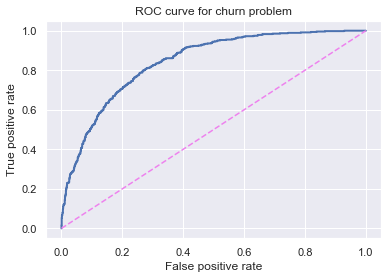

In [161]:
# Increased precision above

fpr, tpr, thresholds = roc_curve(y_test, lr5.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, lr5.predict_proba(X_test)[:,1]))

In [162]:
cm = print_confusion_matrix(confusion_matrix(y_test, lrfit5.predict(X_test)), ['Class 0', 'Class 1'])

NameError: name 'print_confusion_matrix' is not defined

In [163]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X,y)

In [164]:
Counter(y_adasyn)

Counter({0: 5174, 1: 5198})

In [165]:
lr6 = LogisticRegression(max_iter = 2000)
lrfit6 = lr6.fit(X_smoted, y_smoted)
lrpred6 = lrfit6.predict(X_test)

log_acc6 = accuracy_score(y_test, lrpred6)
log_prec6 = precision_score(y_test, lrpred6)
log_rec6 = recall_score(y_test, lrpred6)
# log_pr_curve = precision_recall_curve()

log_f16 = f1_score(y_test, lrpred6)
log_beta6 = fbeta_score(y_test, lrpred6, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print("log accuracy: {}".format(log_acc6))
print("log precision: {}".format(log_prec6))
print("log recall: {}".format(log_rec6))
print("log F1: {}".format(log_f16))
print("log F1 Beta 0.5: {}".format(log_beta6))

log accuracy: 0.7932992617830777
log precision: 0.612691466083151
log recall: 0.5995717344753747
log F1: 0.6060606060606061
log F1 Beta 0.5: 0.6100217864923747


# Random Forest Models

## RANDOM FOREST 1 - Unalanced

In [166]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=40)

In [167]:
rf = RandomForestClassifier()
rffit = rf.fit(X_train, y_train)
rfpred = rffit.predict(X_test)

rf_acc = accuracy_score(y_test, rfpred)
rf_prec = precision_score(y_test, rfpred)
rf_rec = recall_score(y_test, rfpred)
# log_pr_curve = precision_recall_curve()

rf_f1 = f1_score(y_test, rfpred)
rf_beta = fbeta_score(y_test, rfpred, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print('Before handling class imbalance: \n' )
print("log accuracy: {}".format(rf_acc))
print("log precision: {}".format(rf_prec))
print("log recall: {}".format(rf_rec))
print("log F1: {}".format(rf_f1))
print("log F1 Beta 0.5: {}".format(rf_beta))

Before handling class imbalance: 

log accuracy: 0.7677455990914254
log precision: 0.5811965811965812
log recall: 0.43776824034334766
log F1: 0.4993880048959608
log F1 Beta 0.5: 0.5454545454545455


In [168]:
# very low false positive and false negative?

cm = print_confusion_matrix(confusion_matrix(y_test, rffit.predict(X_test)), ['Class 0', 'Class 1'])

NameError: name 'print_confusion_matrix' is not defined

In [ ]:
y_test.value_counts()

ROC AUC score =  0.7996478698195436


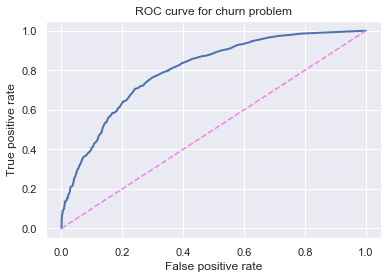

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, rffit.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, rffit.predict_proba(X_test)[:,1]))

## RANDOM FOREST 2 - Balanced

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=40)

rf2 = BalancedRandomForestClassifier()
rffit2 = rf2.fit(X_train, y_train)
rfpred2 = rffit2.predict(X_test)

rf_acc2 = accuracy_score(y_test, rfpred2)
rf_prec2 = precision_score(y_test, rfpred2)
rf_rec2 = recall_score(y_test, rfpred2)
# log_pr_curve = precision_recall_curve()

rf_f12 = f1_score(y_test, rfpred2)
rf_beta2 = fbeta_score(y_test, rfpred2, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print("accuracy: {}".format(rf_acc2))
print("precision: {}".format(rf_prec2))
print("recall: {}".format(rf_rec2))
print("F1: {}".format(rf_f12))
print("F1 Beta 0.5: {}".format(rf_beta2))

accuracy: 0.7291311754684838
precision: 0.4925575101488498
recall: 0.7811158798283262
F1: 0.6041493775933611
F1 Beta 0.5: 0.531852717708942


ROC AUC score =  0.8190970553631498


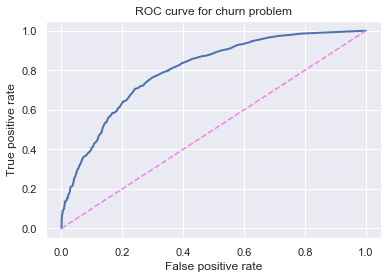

In [171]:
fpr, tpr, thresholds = roc_curve(y_test, rffit.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, rffit2.predict_proba(X_test)[:,1]))

In [172]:

cm = print_confusion_matrix(confusion_matrix(y_test, rffit2.predict(X_test)), ['Class 0', 'Class 1'])

NameError: name 'print_confusion_matrix' is not defined

# Naive Bayes Models

## NAIVE BAYES 1 - Gaussian, unbalanced

In [ ]:
X.shape

In [173]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=40)

nb = BernoulliNB()
nbfit = nb.fit(X_train, y_train)
nbpred = nbfit.predict(X_test)

nb_acc = accuracy_score(y_test, nbpred)
nb_prec = precision_score(y_test, nbpred)
nb_rec = recall_score(y_test, nbpred)
# log_pr_curve = precision_recall_curve()

nb_f1 = f1_score(y_test, nbpred)
nb_beta = fbeta_score(y_test, nbpred, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print("accuracy: {}".format(nb_acc))
print("precision: {}".format(nb_prec))
print("recall: {}".format(nb_rec))
print("F1: {}".format(nb_f1))
print("F1 Beta 0.5: {}".format(nb_beta))

accuracy: 0.7512776831345827
precision: 0.5213414634146342
recall: 0.7339055793991416
F1: 0.6096256684491979
F1 Beta 0.5: 0.5533980582524272


In [174]:
nb.theta_ # mean of each feature by class

AttributeError: 'BernoulliNB' object has no attribute 'theta_'

## NAIVE BAYES 2 - BALANCED

In [ ]:
# Now let's add some random oversampling of the minority classes

X_bal = df.drop(['customerid','churn','tenure_group','monthly_group','total_group','prod_own_group'], axis=1)
y_bal = df.churn

X_train, X_test, y_train, y_test = train_test_split(X_bal,y_bal, test_size = 0.25, random_state=40, stratify=y)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_bal,y_bal)

In [ ]:
nb2 = GaussianNB()
nbfit2 = nb2.fit(X_resampled, y_resampled)
nbpred2 = nbfit2.predict(X_test)

nb_acc2 = accuracy_score(y_test, nbpred2)
nb_prec2 = precision_score(y_test, nbpred2)
nb_rec2 = recall_score(y_test, nbpred2)
# log_pr_curve = precision_recall_curve()

nb_f12 = f1_score(y_test, nbpred2)
nb_beta2 = fbeta_score(y_test, nbpred2, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print("accuracy: {}".format(nb_acc2))
print("precision: {}".format(nb_prec2))
print("recall: {}".format(nb_rec2))
print("F1: {}".format(nb_f12))
print("F1 Beta 0.5: {}".format(nb_beta2))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, nbfit2.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, nbfit2.predict_proba(X_test)[:,1]))

In [ ]:
cm = print_confusion_matrix(confusion_matrix(y_test, nbfit2.predict(X_test)), ['Class 0', 'Class 1'])

In [182]:
from sklearn.dummy import DummyClassifier


dc = DummyClassifier() # not for real problems, just a baseline 
dc.fit(X_train, y_train)
dc.score(X_test, y_test)

/Users/samuelouimet/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.6218057921635435

# XGboost Models

## XGboost 1 Tr/Val


In [104]:
from xgboost import XGBClassifier

In [108]:
import xgboost as xgb

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=40)

In [186]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=7,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy1 = accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
recall1 = recall_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
precision1 = precision_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
f11 = f1_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
fbeta1 = fbeta_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit), 0.5)

print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("recall: %.2f%%" % (recall1 * 100.0))
print("precision: %.2f%%" % (precision1 * 100.0))
print("f1: %.2f%%" % (f11 * 100.0))
print("fbeta: %.2f%%" % (fbeta1 * 100.0))

Accuracy: 79.84%
recall: 51.71%
precision: 66.33%
f1: 58.11%
fbeta: 62.78%


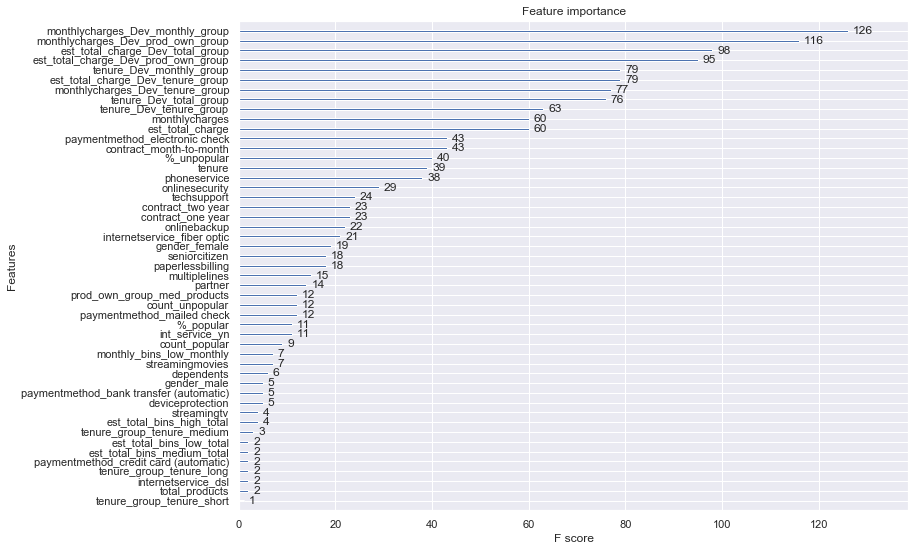

In [187]:
ax = xgb.plot_importance(gbm)
fig = ax.figure
fig.set_size_inches(12, 9)

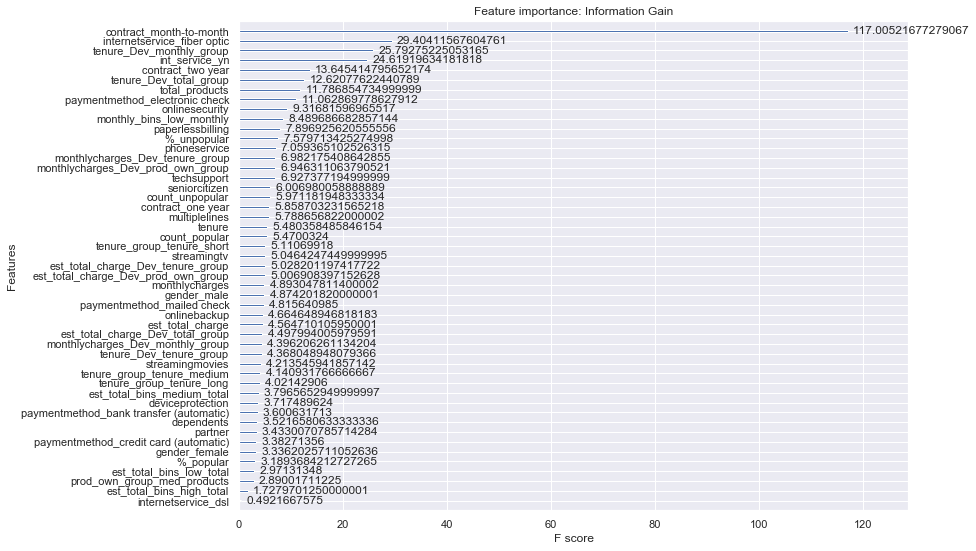

In [188]:
ax1 = xgb.plot_importance(gbm, importance_type='gain', title='Feature importance: Information Gain')
fig1 = ax1.figure
fig1.set_size_inches(12, 9)

In [189]:
all_churn = df[df['churn'] == 1]

all_churn['contract_month-to-month'].sum()

1655

In [190]:
all_churn.shape

(1869, 65)

In [191]:
df.groupby('churn')['contract_month-to-month'].sum()

churn
0    2220.0
1    1655.0
Name: contract_month-to-month, dtype: float64

In [192]:
# THIS IS A HUGE FEATURE!!!!!

## XGboost from web - pipeline 

In [193]:
# FOLLOW THIS!!!!

# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [194]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("\nModel Report")? (<ipython-input-194-d3a582a439d9>, line 18)

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

# SVM Models

In [4]:
X.shape

NameError: name 'X' is not defined

In [5]:
from sklearn import svm
from sklearn.svm import SVC


std_scale = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=40, stratify=y)
X_train_scaled = std_scale.fit_transform(X_train)

In [6]:
X_train.shape

(5282, 59)

In [ ]:
# Re-do with 'polynomial', 'radial biased function',  'sigmioid'


svm = svm.SVC(kernel="linear", gamma = 'auto', C=10)
svm_fit = svm.fit(X_train, y_train)
svmpred = svm_fit.predict(X_test)

svm_acc = accuracy_score(y_test, svmpred)

# svm_rec = recall_score(y_test, svmpred)
# # log_pr_curve = precision_recall_curve()

# svm_f1 = f1_score(y_test, svmpred)
# svm_f1beta = fbeta_score(y_test, svmpred, beta = 0.5)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

#print("precision: {}".format(svm_prec))
print("accuracy: {}".format(svm_acc))
# print("support vectors: ", svm_fit.support_vectors_)
# print("coefficients: ", svm_fit.dual_coef_)
# print("intercept: ", svm_fit.intercept_)

In [ ]:
# CANT GET IT TO RUN

# KNN and proper CV

## KNN - train/test same data

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)



print("Accuracy: %.2f%%" % (accuracy_score(y, y_pred) * 100.0))
print("recall: %.2f%%" % (recall_score(y, y_pred) * 100.0))
print("precision: %.2f%%" % (precision_score(y, y_pred) * 100.0))
print("f1: %.2f%%" % (f1_score(y, y_pred) * 100.0))
print("fbeta: %.2f%%" % (fbeta_score(y, y_pred, 0.5) * 100.0))

Accuracy: 83.15%
recall: 58.75%
precision: 72.52%
f1: 64.91%
fbeta: 69.27%


In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print("Accuracy: %.2f%%" % (accuracy_score(y, y_pred) * 100.0))
print("recall: %.2f%%" % (recall_score(y, y_pred) * 100.0))
print("precision: %.2f%%" % (precision_score(y, y_pred) * 100.0))
print("f1: %.2f%%" % (f1_score(y, y_pred) * 100.0))
print("fbeta: %.2f%%" % (fbeta_score(y, y_pred, 0.5) * 100.0))

Accuracy: 99.67%
recall: 99.30%
precision: 99.46%
f1: 99.38%
fbeta: 99.43%


## KNN - Train/test split 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))
print("recall: %.2f%%" % (recall_score(y_test, y_pred) * 100.0))
print("precision: %.2f%%" % (precision_score(y_test, y_pred) * 100.0))
print("f1: %.2f%%" % (f1_score(y_test, y_pred) * 100.0))
print("fbeta: %.2f%%" % (fbeta_score(y_test, y_pred, 0.5) * 100.0))

Accuracy: 76.15%
recall: 42.84%
precision: 57.27%
f1: 49.01%
fbeta: 53.65%


## KNN - CV  parameter tuning

In [28]:
from sklearn.model_selection import cross_val_score

In [53]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='f1')

print(scores)

[0.48587571 0.51895044 0.5045045  0.54913295 0.49090909 0.49714286
 0.48632219 0.45714286 0.47741935 0.51461988]


In [31]:
print(scores.mean())

0.7614667956157317


In [54]:
# search for an optimal value of K for KNN
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='f1')
    k_scores.append(scores.mean())
print(k_scores)

[0.4769618302711761, 0.37800389781385435, 0.4838802147222564, 0.41842647290796686, 0.49820198275381544, 0.45012360697563814, 0.49749246117921253, 0.4546896606639768, 0.5021777758549879, 0.4623913287783717, 0.4957232062196165, 0.45860383255811693, 0.5003724586182178, 0.4674788783382405, 0.49659970201894577, 0.4712419212261853, 0.4994621059129015, 0.4790061332829758, 0.4976329427031699, 0.47396439911251054, 0.4940674567962001, 0.4710133734864252, 0.48931930236828414, 0.47398678959055224, 0.48940135601967755, 0.47220687164480896, 0.49107547383312866, 0.46823339287192595, 0.48434044847283947, 0.4660974042023616, 0.4767212719540284, 0.46463277023863103, 0.48126767602475357, 0.46370579557161495, 0.477584148586098, 0.4565341520833018, 0.47258450380591344, 0.45258206933190925, 0.473040635594709, 0.45204724890934217, 0.4669200570853854, 0.44974165460717064, 0.4610459928497631, 0.4458082691241111, 0.45634772512273675, 0.43742692041445075, 0.4525665312659918, 0.43447575477771566, 0.44508894167579

Text(0, 0.5, 'Cross-Validated Accuracy')

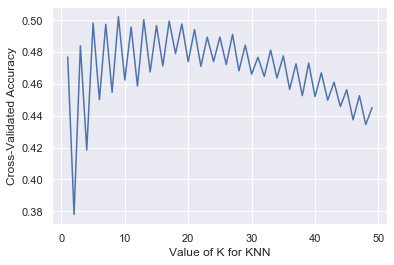

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## KNN - CV for Model Selection

In [42]:
# 10-fold cross-validation with the best KNN model

knn = KNeighborsClassifier(n_neighbors=18)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7850370728562217


In [56]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000)
print(cross_val_score(logreg, X, y, cv=10, scoring='f1').mean())

0.5842401201124879


## KNN - parameter tuning using GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [49]:
# define the parameter values that should be searched
k_range = list(range(1, 100))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [50]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [52]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X, y);

# view the complete results (list of named tuples)
grid.grid_scores_

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)


# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

# FINAL MODELS - Optimising F1

## Logistic Regression - All features, no reg

In [484]:
# dont need to standardise. May need to if I use lasso or ridge!
from sklearn.model_selection import RandomizedSearchCV

#log_grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1')


ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.25, random_state=40)


In [485]:
#Instantiate model

logistic = LogisticRegression(max_iter=2000)

In [501]:
# Hyperparams

#penalty = ['l2']

C = [1,10,100,1000,10000,100000,1000000]

log_hps = dict(C=C)

In [502]:
#Grid search

log_grid = GridSearchCV(logistic, log_hps, cv=10, scoring='f1')

# fit grid search

log_best = log_grid.fit(X_train, y_train)


In [118]:
from sklearn.metrics import SCORERS 
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [503]:
# View best hyperparameters
print('Best C:', log_best.best_estimator_.get_params()['C'])

Best C: 1000000


In [504]:
# predict on test

log_best_pred = log_best.predict(X_test)

In [512]:
test_log = LogisticRegression(C=1, max_iter=2000)
test_log.fit(X_train, y_train)
roc_auc_score(y_test, test_log.predict_proba(X_test)[:,1])

0.8507964411279328

ROC AUC score =  0.8507964411279328


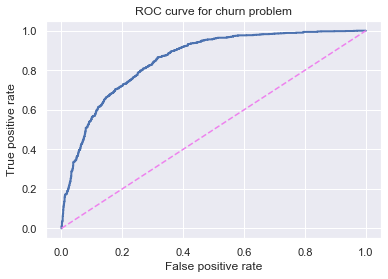

In [513]:
fpr, tpr, thresholds = roc_curve(y_test, log_best.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, test_log.predict_proba(X_test)[:,1]))

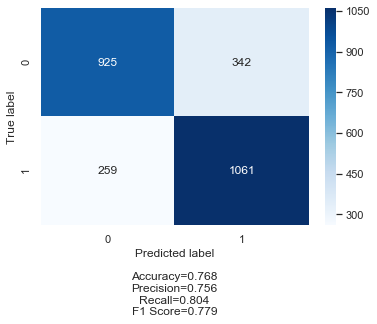

In [514]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_log.predict(X_test))
make_confusion_matrix(cm, percent=None)

In [492]:
log_beta5 = fbeta_score(y_test, log_best_pred, beta = 2)

print("F1 Beta 2: {}".format(log_beta5))

F1 Beta 2: 0.7961354104254044


In [235]:
# NOT NESEARRY NOW SINCE I BALANCED BEFORE# BALANCE THE F1 ...  VAL should be test here # 
def balance_f1(model):
    thresh_ps = np.linspace(.10,.50,1000)
    model_val_probs = log_best.predict_proba(X_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

    f1_scores = []
    for p in thresh_ps:
        model_val_labels = model_val_probs >= p
        f1_scores.append(f1_score(y_test, model_val_labels))

    plt.plot(thresh_ps, f1_scores)
    plt.title('F1 Score vs. Positive Class Decision Probability Threshold')
    plt.xlabel('P threshold')
    plt.ylabel('F1 score')

    best_f1_score = np.max(f1_scores) 
    best_thresh_p = thresh_ps[np.argmax(f1_scores)]

    print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
          % (best_f1_score, best_thresh_p))

Logistic Regression Model best F1 score 0.628 at prob decision threshold >= 0.370


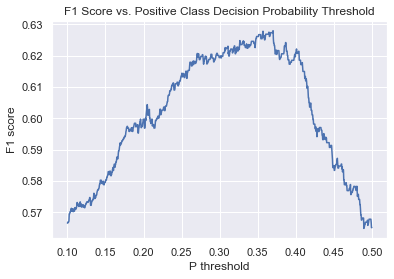

In [236]:
balance_f1(log_best)

## Confusion matrix script

In [94]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax=sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

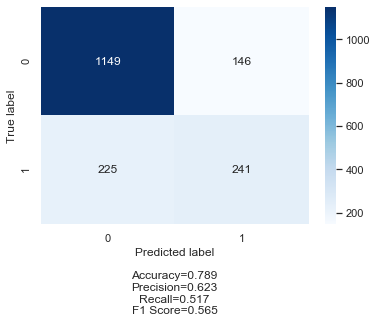

In [228]:
make_confusion_matrix(cm, percent=False)

## Logistic - All feats, L2

In [515]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

std = StandardScaler()
std.fit(X_resampled.values)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.25, random_state=40)

X_train = std.transform(X_train.values)
X_test = std.transform(X_test.values)

In [516]:
logistic2 = LogisticRegression(max_iter=2000)

In [517]:
penalty = ['l2']

C = [1,10,100,1000,10000,100000,1000000]

log_hps_2 = dict(C=C, penalty=penalty)

In [518]:
#Grid search

log_grid_L2 = GridSearchCV(logistic2, log_hps_2, cv=10, scoring='f1')

# fit grid search

log_best_L2 = log_grid_L2.fit(X_train, y_train)


In [519]:
print('Best C:', log_best_L2.best_estimator_.get_params()['C'])

Best C: 1000000


In [ ]:
# Not sure if im predicting using the right set. SKipping a few lines down to rerun.

In [520]:
log_best_predL2 = log_best_L2.predict(X_test)

ROC AUC score =  0.8533699265743464


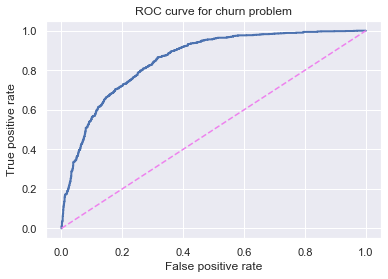

In [521]:
fpr, tpr, thresholds = roc_curve(y_test, log_best_L2.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, log_best_L2.predict_proba(X_test)[:,1]))

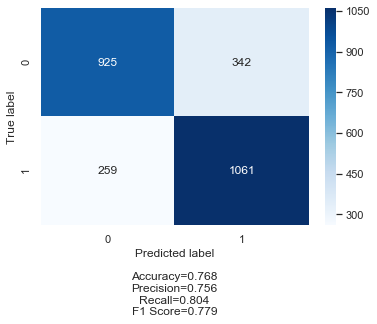

In [522]:
cm_log_L2 = confusion_matrix(y_test, log_best_L2.predict(X_test))
make_confusion_matrix(cm, percent=None)

In [524]:
test_log = LogisticRegression(C=2000000, max_iter=2000)
test_log.fit(X_train, y_train)
roc_auc_score(y_test, test_log.predict_proba(X_test)[:,1])

0.8533794934347422

**F2 SCORE**

In [525]:
log_beta2 = fbeta_score(y_test, log_best_predL2, beta = 2)

print("F1 Beta 2: {}".format(log_beta2))

F1 Beta 2: 0.7979677226539151


In [483]:
# balance classes
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

#scale data for regularization
std = StandardScaler()
std.fit(X_resampled.values)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.25, random_state=40)

X_train = std.transform(X_train.values)
X_test = std.transform(X_test.values)

TypeError: Singleton array array(StandardScaler(copy=True, with_mean=True, with_std=True),
      dtype=object) cannot be considered a valid collection.

ROC AUC score =  0.8533322570615389


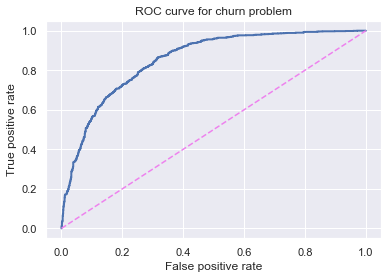

In [482]:
lr_scaled = LogisticRegression(max_iter=2000, C=1291.5496650148827, penalty='l2')

lr_scaled_fit = lr_scaled.fit(X_train, y_train)
lr_scaled_predict = lr_scaled_fit.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, log_best_L2.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, lr_scaled_fit.predict_proba(X_test)[:,1]))

In [ ]:
cm_log_L2 = confusion_matrix(y_test, log_best_L2.predict(X_test))
make_confusion_matrix(cm, percent=None)

## Random Forest - CV/Param tuning

In [435]:
# Balanced baseline - all features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=40)

rf2 = BalancedRandomForestClassifier()
rffit2 = rf2.fit(X_train, y_train)
rfpred2 = rffit2.predict(X_test)

rf_acc2 = accuracy_score(y_test, rfpred2)
rf_prec2 = precision_score(y_test, rfpred2)
rf_rec2 = recall_score(y_test, rfpred2)
# log_pr_curve = precision_recall_curve()

rf_f12 = f1_score(y_test, rfpred2)
rf_beta2 = fbeta_score(y_test, rfpred2, beta = 2)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print("accuracy: {}".format(rf_acc2))
print("precision: {}".format(rf_prec2))
print("recall: {}".format(rf_rec2))
print("F1: {}".format(rf_f12))
print("F1 Beta 2: {}".format(rf_beta2))

accuracy: 0.7314026121521863
precision: 0.49530201342281877
recall: 0.7918454935622318
F1: 0.6094137076796037
F1 Beta 2: 0.7071674971253354


***TRYING TO IMPROVE SCORE WITH FEATURE REDUCTION***

In [436]:
# Feature ranking

feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(rf2.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X_train.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: tenure_Dev_total_group Importance: 0.1
Variable: tenure_Dev_monthly_group Importance: 0.07
Variable: monthlycharges_Dev_prod_own_group Importance: 0.07
Variable: monthlycharges       Importance: 0.05
Variable: contract_month-to-month Importance: 0.05
Variable: monthlycharges_Dev_tenure_group Importance: 0.05
Variable: est_total_charge_Dev_prod_own_group Importance: 0.05
Variable: tenure               Importance: 0.04
Variable: est_total_charge     Importance: 0.04
Variable: monthlycharges_Dev_monthly_group Importance: 0.04
Variable: est_total_charge_Dev_total_group Importance: 0.04
Variable: est_total_charge_Dev_tenure_group Importance: 0.04
Variable: contract_two year    Importance: 0.03
Variable: internetservice_fiber optic Importance: 0.02
Variable: paymentmethod_electronic check Importance: 0.02
Variable: tenure_Dev_tenure_group Importance: 0.02
Variable: %_unpopular          Importance: 0.02
Variable: seniorcitizen        Importance: 0.01
Variable: partner              I

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

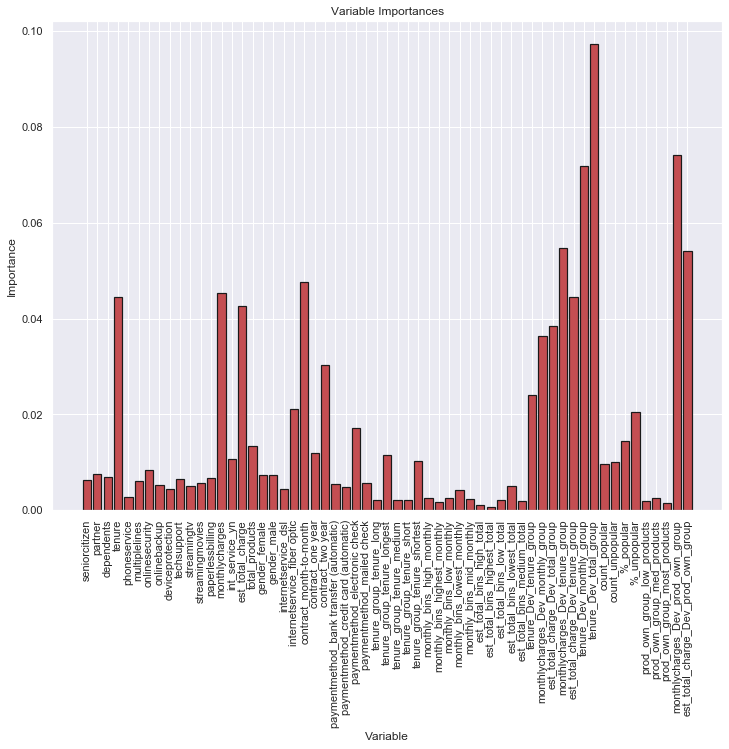

In [437]:
# list of x locations for plotting
x_values = list(range(len(importances)))
plt.figure(figsize=(12,9))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

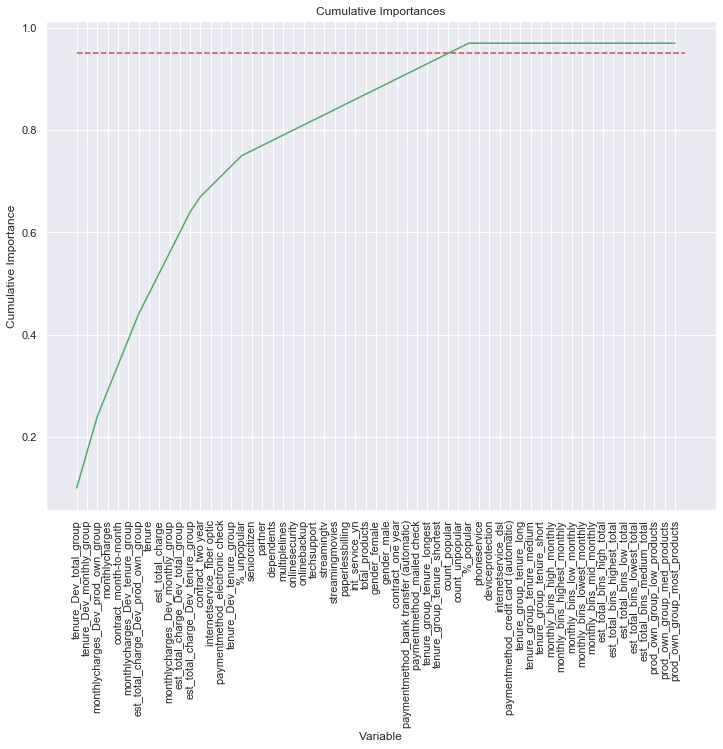

In [442]:
# New train data frame with no features that equal zero

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.figure(figsize=(12,9))
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [443]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 37


In [91]:
# NEW TRAINING SET WITH FEATURE REDUCED!!!

# Extract the names of the most important features

important_feature_names = [feature[0] for feature in feature_importances[0:35]]

X_reduced = X[important_feature_names]

In [445]:
# Balanced baseline NOW WITH REDUCED FEATURE SET FOR COMPARISON WITH BASELINE BEFORE PARAM

X_train, X_test, y_train, y_test = train_test_split(X_reduced,y,test_size = 0.25, random_state=40)

rf2 = BalancedRandomForestClassifier()
rffit2 = rf2.fit(X_train, y_train)
rfpred2 = rffit2.predict(X_test)

rf_acc2 = accuracy_score(y_test, rfpred2)
rf_prec2 = precision_score(y_test, rfpred2)
rf_rec2 = recall_score(y_test, rfpred2)
# log_pr_curve = precision_recall_curve()

rf_f12 = f1_score(y_test, rfpred2)
rf_beta2 = fbeta_score(y_test, rfpred2, beta = 2)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print("accuracy: {}".format(rf_acc2))
print("precision: {}".format(rf_prec2))
print("recall: {}".format(rf_rec2))
print("F1: {}".format(rf_f12))
print("F1 Beta 2: {}".format(rf_beta2))

accuracy: 0.7433276547416241
precision: 0.5096952908587258
recall: 0.7896995708154506
F1: 0.6195286195286196
F1 Beta 2: 0.7115235885537509


In [ ]:
# slight increase above with smaller feature set

# accuracy: 0.7314026121521863
# precision: 0.49530201342281877
# recall: 0.7918454935622318
# F1: 0.6094137076796037
# F1 Beta 2: 0.7071674971253354

In [446]:
# Now onto parameter tuning

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [448]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = BalancedRandomForestClassifier()

# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=40, n_jobs = 1)

# Fit the random search model

rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.4s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   7.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   7.5s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.8s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   4.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   0.7s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=600, min_sample

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True, total=   6.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   0.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, m

[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   7.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   7.0s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   7.0s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   5.5s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estima

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.4s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=   5.6s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1600, min_

[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   5.9s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   4.6s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   4.8s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   6.7s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 12.9min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=BalancedRandomForestClassifier(bootstrap=True,
                                                            ccp_alpha=0.0,
                                                            class_weight=None,
                                                            criterion='gini',
                                                            max_depth=None,
                                                            max_features='auto',
                                                            max_leaf_nodes=None,
                                                            max_samples=None,
                                                            min_impurity_decrease=0.0,
                                                            min_samples_leaf=2,
                                                            min_samples_split=2,
                                                            min_weight_fraction_leaf=0

In [449]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [99]:
# # re-do with optimal features!

X_train, X_test, y_train, y_test = train_test_split(X_reduced,y,test_size = 0.25, random_state=40)


# IGnore unbalanced, this is actually balanced

rf_best_unbal = BalancedRandomForestClassifier(n_estimators= 1400,
                                 min_samples_split = 5,
                                 min_samples_leaf= 4,
                                 max_features= 'auto',
                                 max_depth= None,
                                 bootstrap= True)

rf_best_unbal_fit = rf_best_unbal.fit(X_train, y_train)
rf_best_unbal_pred = rf_best_unbal_fit.predict(X_test)

# vars below are still re-used

rf_acc2 = accuracy_score(y_test, rf_best_unbal_pred)
rf_prec2 = precision_score(y_test, rf_best_unbal_pred)
rf_rec2 = recall_score(y_test, rf_best_unbal_pred)

rf_f12 = f1_score(y_test, rf_best_unbal_pred)
rf_beta2 = fbeta_score(y_test, rf_best_unbal_pred, beta = 2)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print("accuracy: {}".format(rf_acc2))
print("precision: {}".format(rf_prec2))
print("recall: {}".format(rf_rec2))
print("F1: {}".format(rf_f12))
print("F1 Beta 2: {}".format(rf_beta2))

accuracy: 0.7325383304940375
precision: 0.4965986394557823
recall: 0.7832618025751072
F1: 0.607826810990841
F1 Beta 2: 0.7021931512120045


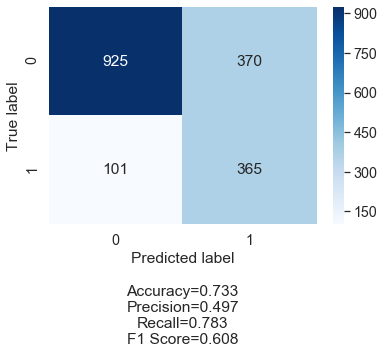

In [100]:
cm = confusion_matrix(y_test, rf_best_unbal.predict(X_test))
make_confusion_matrix(cm, percent=None)

In [ ]:
# Difference is neglagable

# accuracy: 0.7433276547416241
# precision: 0.5096952908587258
# recall: 0.7896995708154506
# F1: 0.6195286195286196
# F1 Beta 2: 0.7115235885537509

## Naive Bayes - Balanced, all features

In [89]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.25, random_state=40)

In [453]:
nb2 = GaussianNB()
nbfit2 = nb2.fit(X_train, y_train)
nbpred2 = nbfit2.predict(X_test)

nb_acc2 = accuracy_score(y_test, nbpred2)
nb_prec2 = precision_score(y_test, nbpred2)
nb_rec2 = recall_score(y_test, nbpred2)
# log_pr_curve = precision_recall_curve()

nb_f12 = f1_score(y_test, nbpred2)
nb_beta2 = fbeta_score(y_test, nbpred2, beta = 2)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print("accuracy: {}".format(nb_acc2))
print("precision: {}".format(nb_prec2))
print("recall: {}".format(nb_rec2))
print("F1: {}".format(nb_f12))
print("F1 Beta 2: {}".format(nb_beta2))
print("ROC AUC score = ", roc_auc_score(y_test, nbfit2.predict_proba(X_test)[:,1]))

accuracy: 0.7533822960958639
precision: 0.7404795486600846
recall: 0.7954545454545454
F1: 0.7669831994156319
F1 Beta 2: 0.7838160644968647
ROC AUC score =  0.8284105857310277


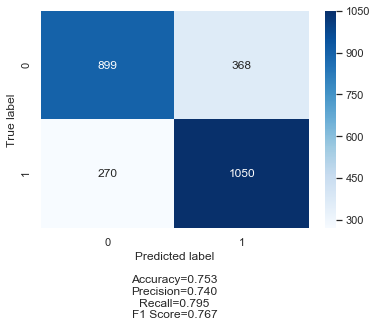

In [454]:
cm_nb1 = confusion_matrix(y_test, nbfit2.predict(X_test))
make_confusion_matrix(cm_nb1, percent=None)

In [344]:
# NOT SURE IF THIS CAN BE TUNED FURTHER???

# BETTER THAN RANDOM FOREST!!! 

## NAIVE BAYES - REDUCED FEATURES

In [95]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_reduced,y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.25, random_state=40)

nb2 = GaussianNB()
nbfit2 = nb2.fit(X_train, y_train)
nbpred2 = nbfit2.predict(X_test)

nb_acc2 = accuracy_score(y_test, nbpred2)
nb_prec2 = precision_score(y_test, nbpred2)
nb_rec2 = recall_score(y_test, nbpred2)
# log_pr_curve = precision_recall_curve()

nb_f12 = f1_score(y_test, nbpred2)
nb_beta2 = fbeta_score(y_test, nbpred2, beta = 2)

# The F-beta score will weight toward Precision when beta 
# is less than one. The F-beta score will weight toward 
# Recall when beta is greater than one.

print("accuracy: {}".format(nb_acc2))
print("precision: {}".format(nb_prec2))
print("recall: {}".format(nb_rec2))
print("F1: {}".format(nb_f12))
print("F1 Beta 2: {}".format(nb_beta2))
print("ROC AUC score = ", roc_auc_score(y_test, nbfit2.predict_proba(X_test)[:,1]))

accuracy: 0.7591805179744878
precision: 0.7418459403192228
recall: 0.8098484848484848
F1: 0.774357116986599
F1 Beta 2: 0.7952685612260081


NameError: name 'roc_auc_score' is not defined

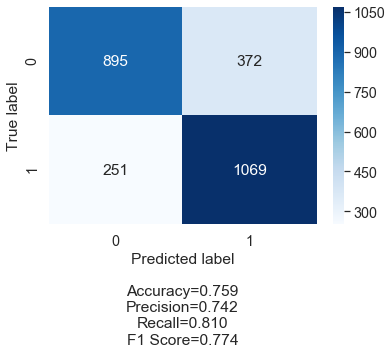

In [96]:
cm_nb1 = confusion_matrix(y_test, nb2.predict(X_test))
make_confusion_matrix(cm_nb1, percent=None)

## XGboost - unbalanced, all features

In [ ]:
#base line on all features

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=40)

gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=7,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=True
                   )

accuracy1 = accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
recall1 = recall_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
precision1 = precision_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
f11 = f1_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
fbeta1 = fbeta_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit), 2)

print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("recall: %.2f%%" % (recall1 * 100.0))
print("precision: %.2f%%" % (precision1 * 100.0))
print("f1: %.2f%%" % (f11 * 100.0))
print("fbeta: %.2f%%" % (fbeta1 * 100.0))

[0]	validation_0-error:0.203314	validation_1-error:0.217885
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.203314	validation_1-error:0.217885
[2]	validation_0-error:0.20142	validation_1-error:0.215756
[3]	validation_0-error:0.200237	validation_1-error:0.209368
[4]	validation_0-error:0.19858	validation_1-error:0.208659
[5]	validation_0-error:0.195976	validation_1-error:0.203691
[6]	validation_0-error:0.195976	validation_1-error:0.207949
[7]	validation_0-error:0.195976	validation_1-error:0.206529
[8]	validation_0-error:0.195976	validation_1-error:0.207949
[9]	validation_0-error:0.195976	validation_1-error:0.210078
[10]	validation_0-error:0.19574	validation_1-error:0.210788
[11]	validation_0-error:0.193846	validation_1-error:0.20582
[12]	validation_0-error:0.194793	validation_1-error:0.206529
[13]	validation_0-error:0.19503	validation_1-error:0.207239


[132]	validation_0-error:0.16355	validation_1-error:0.187367
[133]	validation_0-error:0.163077	validation_1-error:0.188077
Stopping. Best iteration:
[83]	validation_0-error:0.176095	validation_1-error:0.186657

Accuracy: 79.84%
recall: 51.71%
precision: 66.33%
f1: 58.11%
fbeta: 54.09%


In [328]:
#base line on REDUCED features

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=40)

gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=7,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy1 = accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
recall1 = recall_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
precision1 = precision_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
f11 = f1_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
fbeta1 = fbeta_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit), 2)

print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("recall: %.2f%%" % (recall1 * 100.0))
print("precision: %.2f%%" % (precision1 * 100.0))
print("f1: %.2f%%" % (f11 * 100.0))
print("fbeta: %.2f%%" % (fbeta1 * 100.0))

Accuracy: 79.13%
recall: 50.39%
precision: 64.65%
f1: 56.64%
fbeta: 52.72%


In [329]:
# WORSE WITH LESS FEATURES. MAKE SURE FIRST CELL IS RUN MOST RECENTTLY SINCE WE WANT THAT

## XGBoost - Balanced, all features

In [106]:
sns.set(font_scale = 1.3)

In [102]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)

In [109]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=7,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=True
                   )
xgbpred = fit_model.predict(X_test)

accuracy1 = accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
recall1 = recall_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
precision1 = precision_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
f11 = f1_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
fbeta1 = fbeta_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit), 2)

print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("recall: %.2f%%" % (recall1 * 100.0))
print("precision: %.2f%%" % (precision1 * 100.0))
print("f1: %.2f%%" % (f11 * 100.0))
print("fbeta: %.2f%%" % (fbeta1 * 100.0))
#print("ROC AUC score = ", roc_auc_score(y_test, fit_model.predict(X_test, ntree_limit=gbm.best_ntree_limit)[:,1]))

[0]	validation_0-auc:0.845018	validation_1-auc:0.837579
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.851247	validation_1-auc:0.845589
[2]	validation_0-auc:0.856255	validation_1-auc:0.850648
[3]	validation_0-auc:0.85749	validation_1-auc:0.84967
[4]	validation_0-auc:0.857715	validation_1-auc:0.849526
[5]	validation_0-auc:0.857858	validation_1-auc:0.850324
[6]	validation_0-auc:0.859749	validation_1-auc:0.852066
[7]	validation_0-auc:0.861734	validation_1-auc:0.853865
[8]	validation_0-auc:0.861818	validation_1-auc:0.854795
[9]	validation_0-auc:0.862342	validation_1-auc:0.855822
[10]	validation_0-auc:0.862839	validation_1-auc:0.856737
[11]	validation_0-auc:0.862732	validation_1-auc:0.856313
[12]	validation_0-auc:0.863044	validation_1-auc:0.856962
[13]	validation_0-auc:0.86353	validation_1-auc:0.857625
[14]	validation_0-auc:0.863951	validation_1-auc:0.857675
[

[141]	validation_0-auc:0.89241	validation_1-auc:0.878484
[142]	validation_0-auc:0.892515	validation_1-auc:0.878544
[143]	validation_0-auc:0.892602	validation_1-auc:0.8786
[144]	validation_0-auc:0.892977	validation_1-auc:0.87891
[145]	validation_0-auc:0.893027	validation_1-auc:0.879065
[146]	validation_0-auc:0.893113	validation_1-auc:0.879085
[147]	validation_0-auc:0.893297	validation_1-auc:0.879144
[148]	validation_0-auc:0.893467	validation_1-auc:0.879187
[149]	validation_0-auc:0.893635	validation_1-auc:0.879236
[150]	validation_0-auc:0.893982	validation_1-auc:0.879431
[151]	validation_0-auc:0.894231	validation_1-auc:0.879552
[152]	validation_0-auc:0.894503	validation_1-auc:0.87976
[153]	validation_0-auc:0.894753	validation_1-auc:0.880074
[154]	validation_0-auc:0.895095	validation_1-auc:0.880269
[155]	validation_0-auc:0.895419	validation_1-auc:0.880568
[156]	validation_0-auc:0.895562	validation_1-auc:0.880632
[157]	validation_0-auc:0.895743	validation_1-auc:0.880771
[158]	validation_0-

[283]	validation_0-auc:0.916023	validation_1-auc:0.893943
[284]	validation_0-auc:0.916047	validation_1-auc:0.893895
[285]	validation_0-auc:0.916168	validation_1-auc:0.893964
[286]	validation_0-auc:0.916134	validation_1-auc:0.893972
[287]	validation_0-auc:0.916253	validation_1-auc:0.893992
[288]	validation_0-auc:0.916366	validation_1-auc:0.894052
[289]	validation_0-auc:0.916492	validation_1-auc:0.89409
[290]	validation_0-auc:0.916525	validation_1-auc:0.894061
[291]	validation_0-auc:0.916586	validation_1-auc:0.89409
[292]	validation_0-auc:0.916732	validation_1-auc:0.894324
[293]	validation_0-auc:0.916831	validation_1-auc:0.894348
[294]	validation_0-auc:0.917039	validation_1-auc:0.894443
[295]	validation_0-auc:0.917105	validation_1-auc:0.894454
[296]	validation_0-auc:0.917129	validation_1-auc:0.894479
[297]	validation_0-auc:0.917134	validation_1-auc:0.894554
[298]	validation_0-auc:0.917346	validation_1-auc:0.89467
[299]	validation_0-auc:0.917451	validation_1-auc:0.894747
[300]	validation_

[425]	validation_0-auc:0.931493	validation_1-auc:0.904937
[426]	validation_0-auc:0.931505	validation_1-auc:0.904925
[427]	validation_0-auc:0.931621	validation_1-auc:0.905025
[428]	validation_0-auc:0.931783	validation_1-auc:0.905244
[429]	validation_0-auc:0.931935	validation_1-auc:0.905172
[430]	validation_0-auc:0.932013	validation_1-auc:0.905088
[431]	validation_0-auc:0.932128	validation_1-auc:0.905138
[432]	validation_0-auc:0.932202	validation_1-auc:0.905158
[433]	validation_0-auc:0.932334	validation_1-auc:0.905294
[434]	validation_0-auc:0.932347	validation_1-auc:0.905306
[435]	validation_0-auc:0.932402	validation_1-auc:0.905349
[436]	validation_0-auc:0.932477	validation_1-auc:0.905414
[437]	validation_0-auc:0.932529	validation_1-auc:0.905504
[438]	validation_0-auc:0.932586	validation_1-auc:0.905568
[439]	validation_0-auc:0.932635	validation_1-auc:0.905531
[440]	validation_0-auc:0.932689	validation_1-auc:0.905542
[441]	validation_0-auc:0.932828	validation_1-auc:0.905556
[442]	validati

[567]	validation_0-auc:0.942735	validation_1-auc:0.912014
[568]	validation_0-auc:0.942875	validation_1-auc:0.912125
[569]	validation_0-auc:0.942983	validation_1-auc:0.912282
[570]	validation_0-auc:0.943114	validation_1-auc:0.912317
[571]	validation_0-auc:0.94317	validation_1-auc:0.912363
[572]	validation_0-auc:0.943233	validation_1-auc:0.91242
[573]	validation_0-auc:0.943267	validation_1-auc:0.912426
[574]	validation_0-auc:0.94336	validation_1-auc:0.912516
[575]	validation_0-auc:0.94339	validation_1-auc:0.91254
[576]	validation_0-auc:0.943472	validation_1-auc:0.912658
[577]	validation_0-auc:0.943637	validation_1-auc:0.912743
[578]	validation_0-auc:0.943712	validation_1-auc:0.91277
[579]	validation_0-auc:0.94376	validation_1-auc:0.912821
[580]	validation_0-auc:0.943801	validation_1-auc:0.91292
[581]	validation_0-auc:0.943841	validation_1-auc:0.912959
[582]	validation_0-auc:0.943914	validation_1-auc:0.912992
[583]	validation_0-auc:0.943987	validation_1-auc:0.913027
[584]	validation_0-auc

[710]	validation_0-auc:0.951294	validation_1-auc:0.917101
[711]	validation_0-auc:0.951308	validation_1-auc:0.917059
[712]	validation_0-auc:0.951438	validation_1-auc:0.917118
[713]	validation_0-auc:0.951455	validation_1-auc:0.917148
[714]	validation_0-auc:0.951549	validation_1-auc:0.91718
[715]	validation_0-auc:0.951577	validation_1-auc:0.917148
[716]	validation_0-auc:0.951665	validation_1-auc:0.917293
[717]	validation_0-auc:0.951724	validation_1-auc:0.917413
[718]	validation_0-auc:0.951738	validation_1-auc:0.917438
[719]	validation_0-auc:0.951861	validation_1-auc:0.917551
[720]	validation_0-auc:0.952003	validation_1-auc:0.917697
[721]	validation_0-auc:0.952064	validation_1-auc:0.917736
[722]	validation_0-auc:0.952075	validation_1-auc:0.917689
[723]	validation_0-auc:0.952112	validation_1-auc:0.917717
[724]	validation_0-auc:0.95217	validation_1-auc:0.917707
[725]	validation_0-auc:0.95219	validation_1-auc:0.91772
[726]	validation_0-auc:0.952204	validation_1-auc:0.917756
[727]	validation_0

[852]	validation_0-auc:0.958458	validation_1-auc:0.922326
[853]	validation_0-auc:0.958541	validation_1-auc:0.922414
[854]	validation_0-auc:0.958556	validation_1-auc:0.922438
[855]	validation_0-auc:0.958608	validation_1-auc:0.922477
[856]	validation_0-auc:0.958631	validation_1-auc:0.922486
[857]	validation_0-auc:0.958711	validation_1-auc:0.922565
[858]	validation_0-auc:0.958711	validation_1-auc:0.922539
[859]	validation_0-auc:0.95885	validation_1-auc:0.922635
[860]	validation_0-auc:0.958926	validation_1-auc:0.922653
[861]	validation_0-auc:0.95891	validation_1-auc:0.922659
[862]	validation_0-auc:0.958901	validation_1-auc:0.922695
[863]	validation_0-auc:0.95892	validation_1-auc:0.922766
[864]	validation_0-auc:0.958949	validation_1-auc:0.922836
[865]	validation_0-auc:0.958995	validation_1-auc:0.922816
[866]	validation_0-auc:0.959051	validation_1-auc:0.922845
[867]	validation_0-auc:0.959083	validation_1-auc:0.922751
[868]	validation_0-auc:0.959132	validation_1-auc:0.922797
[869]	validation_

[994]	validation_0-auc:0.964872	validation_1-auc:0.927256
[995]	validation_0-auc:0.964914	validation_1-auc:0.927233
[996]	validation_0-auc:0.96491	validation_1-auc:0.92727
[997]	validation_0-auc:0.965051	validation_1-auc:0.927358
[998]	validation_0-auc:0.965085	validation_1-auc:0.927426
[999]	validation_0-auc:0.965076	validation_1-auc:0.927445
[1000]	validation_0-auc:0.965157	validation_1-auc:0.927601
[1001]	validation_0-auc:0.965186	validation_1-auc:0.927568
[1002]	validation_0-auc:0.965333	validation_1-auc:0.927675
[1003]	validation_0-auc:0.965305	validation_1-auc:0.927652
[1004]	validation_0-auc:0.965335	validation_1-auc:0.927699
[1005]	validation_0-auc:0.965331	validation_1-auc:0.92768
[1006]	validation_0-auc:0.965337	validation_1-auc:0.927698
[1007]	validation_0-auc:0.965431	validation_1-auc:0.927739
[1008]	validation_0-auc:0.965472	validation_1-auc:0.927801
[1009]	validation_0-auc:0.965501	validation_1-auc:0.927788
[1010]	validation_0-auc:0.965517	validation_1-auc:0.92777
[1011]	

[1134]	validation_0-auc:0.970059	validation_1-auc:0.93072
[1135]	validation_0-auc:0.970047	validation_1-auc:0.930769
[1136]	validation_0-auc:0.970048	validation_1-auc:0.930835
[1137]	validation_0-auc:0.970068	validation_1-auc:0.930834
[1138]	validation_0-auc:0.970144	validation_1-auc:0.930851
[1139]	validation_0-auc:0.970179	validation_1-auc:0.930909
[1140]	validation_0-auc:0.970203	validation_1-auc:0.930959
[1141]	validation_0-auc:0.970206	validation_1-auc:0.930983
[1142]	validation_0-auc:0.970226	validation_1-auc:0.930982
[1143]	validation_0-auc:0.970227	validation_1-auc:0.930868
[1144]	validation_0-auc:0.970217	validation_1-auc:0.930847
[1145]	validation_0-auc:0.970365	validation_1-auc:0.931024
[1146]	validation_0-auc:0.970428	validation_1-auc:0.931107
[1147]	validation_0-auc:0.970464	validation_1-auc:0.931168
[1148]	validation_0-auc:0.970526	validation_1-auc:0.93118
[1149]	validation_0-auc:0.970548	validation_1-auc:0.931145
[1150]	validation_0-auc:0.970544	validation_1-auc:0.931078

[1274]	validation_0-auc:0.97412	validation_1-auc:0.933833
[1275]	validation_0-auc:0.97416	validation_1-auc:0.933873
[1276]	validation_0-auc:0.974181	validation_1-auc:0.933829
[1277]	validation_0-auc:0.974138	validation_1-auc:0.933691
[1278]	validation_0-auc:0.974197	validation_1-auc:0.933742
[1279]	validation_0-auc:0.974216	validation_1-auc:0.933766
[1280]	validation_0-auc:0.974305	validation_1-auc:0.933755
[1281]	validation_0-auc:0.974319	validation_1-auc:0.933758
[1282]	validation_0-auc:0.974348	validation_1-auc:0.93377
[1283]	validation_0-auc:0.974376	validation_1-auc:0.933774
[1284]	validation_0-auc:0.9744	validation_1-auc:0.933816
[1285]	validation_0-auc:0.974435	validation_1-auc:0.933797
[1286]	validation_0-auc:0.97443	validation_1-auc:0.933801
[1287]	validation_0-auc:0.974488	validation_1-auc:0.933864
[1288]	validation_0-auc:0.974498	validation_1-auc:0.933846
[1289]	validation_0-auc:0.974556	validation_1-auc:0.933811
[1290]	validation_0-auc:0.974571	validation_1-auc:0.933773
[12

[1414]	validation_0-auc:0.977499	validation_1-auc:0.93627
[1415]	validation_0-auc:0.977508	validation_1-auc:0.936282
[1416]	validation_0-auc:0.977531	validation_1-auc:0.936319
[1417]	validation_0-auc:0.977598	validation_1-auc:0.936364
[1418]	validation_0-auc:0.977647	validation_1-auc:0.936359
[1419]	validation_0-auc:0.977698	validation_1-auc:0.936352
[1420]	validation_0-auc:0.977691	validation_1-auc:0.936362
[1421]	validation_0-auc:0.977715	validation_1-auc:0.936403
[1422]	validation_0-auc:0.977714	validation_1-auc:0.936387
[1423]	validation_0-auc:0.977737	validation_1-auc:0.936341
[1424]	validation_0-auc:0.977758	validation_1-auc:0.936366
[1425]	validation_0-auc:0.977775	validation_1-auc:0.936375
[1426]	validation_0-auc:0.977834	validation_1-auc:0.936439
[1427]	validation_0-auc:0.97787	validation_1-auc:0.936471
[1428]	validation_0-auc:0.977875	validation_1-auc:0.936552
[1429]	validation_0-auc:0.977894	validation_1-auc:0.936636
[1430]	validation_0-auc:0.977929	validation_1-auc:0.936647

[1554]	validation_0-auc:0.980675	validation_1-auc:0.938791
[1555]	validation_0-auc:0.980688	validation_1-auc:0.938853
[1556]	validation_0-auc:0.980715	validation_1-auc:0.938846
[1557]	validation_0-auc:0.980732	validation_1-auc:0.938877
[1558]	validation_0-auc:0.980746	validation_1-auc:0.938845
[1559]	validation_0-auc:0.98074	validation_1-auc:0.938861
[1560]	validation_0-auc:0.98079	validation_1-auc:0.938939
[1561]	validation_0-auc:0.980834	validation_1-auc:0.938958
[1562]	validation_0-auc:0.980863	validation_1-auc:0.938943
[1563]	validation_0-auc:0.980852	validation_1-auc:0.939001
[1564]	validation_0-auc:0.980869	validation_1-auc:0.939047
[1565]	validation_0-auc:0.980863	validation_1-auc:0.939097
[1566]	validation_0-auc:0.980849	validation_1-auc:0.93907
[1567]	validation_0-auc:0.980874	validation_1-auc:0.939067
[1568]	validation_0-auc:0.980933	validation_1-auc:0.939088
[1569]	validation_0-auc:0.980957	validation_1-auc:0.939098
[1570]	validation_0-auc:0.980948	validation_1-auc:0.939085


[1694]	validation_0-auc:0.983375	validation_1-auc:0.940773
[1695]	validation_0-auc:0.983381	validation_1-auc:0.940769
[1696]	validation_0-auc:0.983434	validation_1-auc:0.940835
[1697]	validation_0-auc:0.983433	validation_1-auc:0.940794
[1698]	validation_0-auc:0.983454	validation_1-auc:0.940822
[1699]	validation_0-auc:0.983465	validation_1-auc:0.940833
[1700]	validation_0-auc:0.98347	validation_1-auc:0.94086
[1701]	validation_0-auc:0.983496	validation_1-auc:0.940897
[1702]	validation_0-auc:0.983496	validation_1-auc:0.940876
[1703]	validation_0-auc:0.983544	validation_1-auc:0.940873
[1704]	validation_0-auc:0.983524	validation_1-auc:0.940879
[1705]	validation_0-auc:0.983552	validation_1-auc:0.940895
[1706]	validation_0-auc:0.983542	validation_1-auc:0.94089
[1707]	validation_0-auc:0.983514	validation_1-auc:0.941014
[1708]	validation_0-auc:0.983522	validation_1-auc:0.941027
[1709]	validation_0-auc:0.983519	validation_1-auc:0.940936
[1710]	validation_0-auc:0.983512	validation_1-auc:0.940977


[1834]	validation_0-auc:0.985286	validation_1-auc:0.942268
[1835]	validation_0-auc:0.985316	validation_1-auc:0.942267
[1836]	validation_0-auc:0.985297	validation_1-auc:0.942261
[1837]	validation_0-auc:0.985292	validation_1-auc:0.942273
[1838]	validation_0-auc:0.985308	validation_1-auc:0.94226
[1839]	validation_0-auc:0.985295	validation_1-auc:0.942236
[1840]	validation_0-auc:0.98531	validation_1-auc:0.942235
[1841]	validation_0-auc:0.98531	validation_1-auc:0.942246
[1842]	validation_0-auc:0.985294	validation_1-auc:0.942226
[1843]	validation_0-auc:0.98535	validation_1-auc:0.942247
[1844]	validation_0-auc:0.985344	validation_1-auc:0.942258
[1845]	validation_0-auc:0.985354	validation_1-auc:0.942319
[1846]	validation_0-auc:0.985372	validation_1-auc:0.942321
[1847]	validation_0-auc:0.985401	validation_1-auc:0.942311
[1848]	validation_0-auc:0.985405	validation_1-auc:0.942356
[1849]	validation_0-auc:0.985367	validation_1-auc:0.94235
[1850]	validation_0-auc:0.985364	validation_1-auc:0.942353
[1

[1974]	validation_0-auc:0.987034	validation_1-auc:0.943662
[1975]	validation_0-auc:0.987056	validation_1-auc:0.94367
[1976]	validation_0-auc:0.98706	validation_1-auc:0.943702
[1977]	validation_0-auc:0.987085	validation_1-auc:0.943696
[1978]	validation_0-auc:0.987105	validation_1-auc:0.943699
[1979]	validation_0-auc:0.987095	validation_1-auc:0.943715
[1980]	validation_0-auc:0.987169	validation_1-auc:0.94372
[1981]	validation_0-auc:0.987176	validation_1-auc:0.943714
[1982]	validation_0-auc:0.987189	validation_1-auc:0.943679
[1983]	validation_0-auc:0.987293	validation_1-auc:0.94386
[1984]	validation_0-auc:0.987339	validation_1-auc:0.943894
[1985]	validation_0-auc:0.987332	validation_1-auc:0.943826
[1986]	validation_0-auc:0.987352	validation_1-auc:0.943845
[1987]	validation_0-auc:0.987388	validation_1-auc:0.943884
[1988]	validation_0-auc:0.987359	validation_1-auc:0.943901
[1989]	validation_0-auc:0.987351	validation_1-auc:0.943901
[1990]	validation_0-auc:0.987372	validation_1-auc:0.943908
[

[2114]	validation_0-auc:0.98877	validation_1-auc:0.944917
[2115]	validation_0-auc:0.9888	validation_1-auc:0.94494
[2116]	validation_0-auc:0.988805	validation_1-auc:0.944962
[2117]	validation_0-auc:0.988813	validation_1-auc:0.945013
[2118]	validation_0-auc:0.988791	validation_1-auc:0.944988
[2119]	validation_0-auc:0.988792	validation_1-auc:0.944964
[2120]	validation_0-auc:0.988826	validation_1-auc:0.944953
[2121]	validation_0-auc:0.988829	validation_1-auc:0.944932
[2122]	validation_0-auc:0.988821	validation_1-auc:0.944909
[2123]	validation_0-auc:0.988867	validation_1-auc:0.944901
[2124]	validation_0-auc:0.988873	validation_1-auc:0.94491
[2125]	validation_0-auc:0.988897	validation_1-auc:0.944898
[2126]	validation_0-auc:0.988897	validation_1-auc:0.944909
[2127]	validation_0-auc:0.988906	validation_1-auc:0.944905
[2128]	validation_0-auc:0.988907	validation_1-auc:0.94492
[2129]	validation_0-auc:0.988922	validation_1-auc:0.944951
[2130]	validation_0-auc:0.988933	validation_1-auc:0.945015
[21

[2254]	validation_0-auc:0.990293	validation_1-auc:0.946046
[2255]	validation_0-auc:0.990268	validation_1-auc:0.946039
[2256]	validation_0-auc:0.990255	validation_1-auc:0.945986
[2257]	validation_0-auc:0.990266	validation_1-auc:0.945994
[2258]	validation_0-auc:0.99028	validation_1-auc:0.945983
[2259]	validation_0-auc:0.990277	validation_1-auc:0.945986
[2260]	validation_0-auc:0.990279	validation_1-auc:0.946051
[2261]	validation_0-auc:0.990303	validation_1-auc:0.946091
[2262]	validation_0-auc:0.990326	validation_1-auc:0.946104
[2263]	validation_0-auc:0.990323	validation_1-auc:0.94609
[2264]	validation_0-auc:0.990322	validation_1-auc:0.946092
[2265]	validation_0-auc:0.990344	validation_1-auc:0.946108
[2266]	validation_0-auc:0.990368	validation_1-auc:0.946124
[2267]	validation_0-auc:0.990369	validation_1-auc:0.946046
[2268]	validation_0-auc:0.990412	validation_1-auc:0.946049
[2269]	validation_0-auc:0.99045	validation_1-auc:0.946057
[2270]	validation_0-auc:0.990454	validation_1-auc:0.946052


[2394]	validation_0-auc:0.991415	validation_1-auc:0.947101
[2395]	validation_0-auc:0.99144	validation_1-auc:0.947137
[2396]	validation_0-auc:0.991446	validation_1-auc:0.947131
[2397]	validation_0-auc:0.991463	validation_1-auc:0.947169
[2398]	validation_0-auc:0.991448	validation_1-auc:0.94718
[2399]	validation_0-auc:0.991423	validation_1-auc:0.947092
[2400]	validation_0-auc:0.991437	validation_1-auc:0.947075
[2401]	validation_0-auc:0.991445	validation_1-auc:0.947127
[2402]	validation_0-auc:0.991446	validation_1-auc:0.947142
[2403]	validation_0-auc:0.991432	validation_1-auc:0.947137
[2404]	validation_0-auc:0.991451	validation_1-auc:0.947161
[2405]	validation_0-auc:0.99149	validation_1-auc:0.947173
[2406]	validation_0-auc:0.9915	validation_1-auc:0.947181
[2407]	validation_0-auc:0.991522	validation_1-auc:0.947206
[2408]	validation_0-auc:0.991514	validation_1-auc:0.947216
[2409]	validation_0-auc:0.99151	validation_1-auc:0.947233
[2410]	validation_0-auc:0.991518	validation_1-auc:0.947228
[24

[2534]	validation_0-auc:0.992569	validation_1-auc:0.948167
[2535]	validation_0-auc:0.992582	validation_1-auc:0.948168
[2536]	validation_0-auc:0.992587	validation_1-auc:0.948207
[2537]	validation_0-auc:0.9926	validation_1-auc:0.948186
[2538]	validation_0-auc:0.992609	validation_1-auc:0.94825
[2539]	validation_0-auc:0.992646	validation_1-auc:0.948259
[2540]	validation_0-auc:0.992647	validation_1-auc:0.948286
[2541]	validation_0-auc:0.992648	validation_1-auc:0.948294
[2542]	validation_0-auc:0.992694	validation_1-auc:0.948338
[2543]	validation_0-auc:0.992699	validation_1-auc:0.948323
[2544]	validation_0-auc:0.992678	validation_1-auc:0.948307
[2545]	validation_0-auc:0.992699	validation_1-auc:0.948295
[2546]	validation_0-auc:0.992699	validation_1-auc:0.948302
[2547]	validation_0-auc:0.992713	validation_1-auc:0.948308
[2548]	validation_0-auc:0.99271	validation_1-auc:0.948342
[2549]	validation_0-auc:0.992685	validation_1-auc:0.948352
[2550]	validation_0-auc:0.992705	validation_1-auc:0.948369
[

[2674]	validation_0-auc:0.993511	validation_1-auc:0.948932
[2675]	validation_0-auc:0.993547	validation_1-auc:0.948971
[2676]	validation_0-auc:0.993556	validation_1-auc:0.948959
[2677]	validation_0-auc:0.993574	validation_1-auc:0.94897
[2678]	validation_0-auc:0.993575	validation_1-auc:0.948988
[2679]	validation_0-auc:0.993578	validation_1-auc:0.948958
[2680]	validation_0-auc:0.993581	validation_1-auc:0.948957
[2681]	validation_0-auc:0.993578	validation_1-auc:0.948969
[2682]	validation_0-auc:0.993626	validation_1-auc:0.949015
[2683]	validation_0-auc:0.99364	validation_1-auc:0.949034
[2684]	validation_0-auc:0.993624	validation_1-auc:0.949075
[2685]	validation_0-auc:0.993649	validation_1-auc:0.949047
[2686]	validation_0-auc:0.993643	validation_1-auc:0.949082
[2687]	validation_0-auc:0.99365	validation_1-auc:0.949095
[2688]	validation_0-auc:0.993643	validation_1-auc:0.949138
[2689]	validation_0-auc:0.993655	validation_1-auc:0.949119
[2690]	validation_0-auc:0.993667	validation_1-auc:0.949116


[2814]	validation_0-auc:0.994269	validation_1-auc:0.949538
[2815]	validation_0-auc:0.994266	validation_1-auc:0.949519
[2816]	validation_0-auc:0.994279	validation_1-auc:0.949519
[2817]	validation_0-auc:0.994268	validation_1-auc:0.949516
[2818]	validation_0-auc:0.994271	validation_1-auc:0.949562
[2819]	validation_0-auc:0.994281	validation_1-auc:0.949575
[2820]	validation_0-auc:0.994308	validation_1-auc:0.949593
[2821]	validation_0-auc:0.994312	validation_1-auc:0.949537
[2822]	validation_0-auc:0.994307	validation_1-auc:0.949577
[2823]	validation_0-auc:0.994318	validation_1-auc:0.949558
[2824]	validation_0-auc:0.994326	validation_1-auc:0.949534
[2825]	validation_0-auc:0.994307	validation_1-auc:0.949516
[2826]	validation_0-auc:0.994297	validation_1-auc:0.949497
[2827]	validation_0-auc:0.994313	validation_1-auc:0.949504
[2828]	validation_0-auc:0.994304	validation_1-auc:0.949516
[2829]	validation_0-auc:0.99428	validation_1-auc:0.949525
[2830]	validation_0-auc:0.994299	validation_1-auc:0.94952

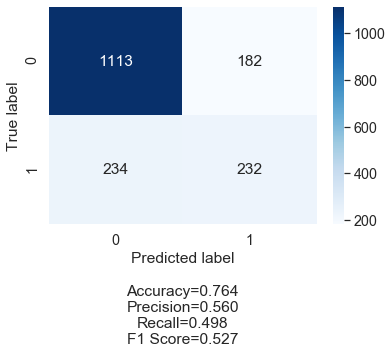

In [110]:
cm_XGB = confusion_matrix(y_test, xgbpred)
make_confusion_matrix(cm_XGB, percent=None)

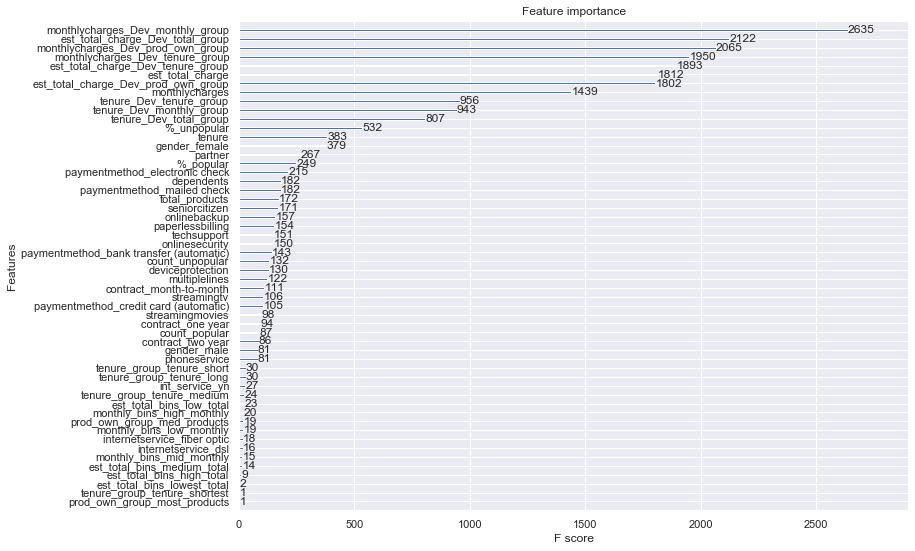

In [357]:
ax = xgb.plot_importance(gbm)
fig = ax.figure
fig.set_size_inches(12, 9)

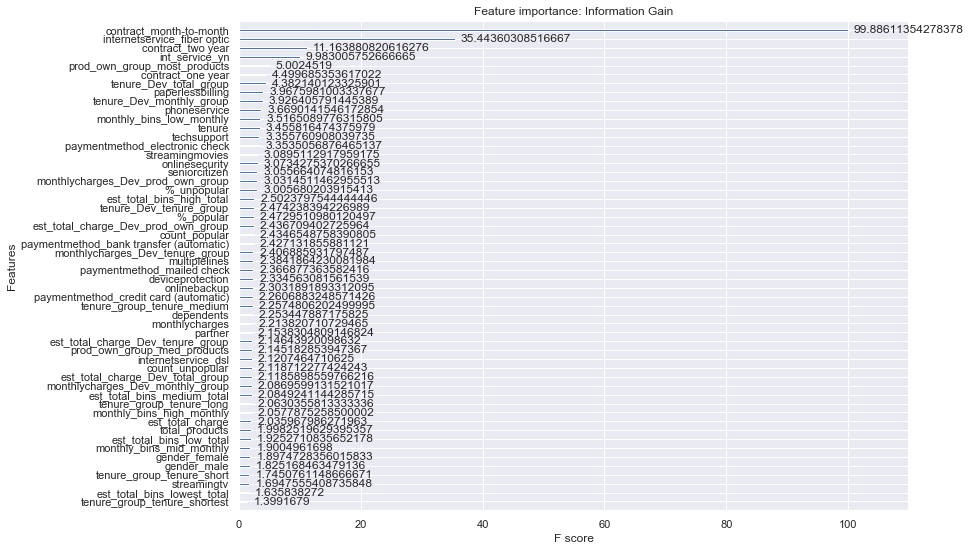

In [358]:
ax1 = xgb.plot_importance(gbm, importance_type='gain', title='Feature importance: Information Gain')
fig1 = ax1.figure
fig1.set_size_inches(12, 9)

**START TUNING**

In [370]:
 #Tune max_depth and min_child_weight

In [419]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)


param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=2461, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

/Users/samuelouimet/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 9, 'min_child_weight': 1}, 0.8473567771359602)

In [420]:
# NARROW THIS SEARCH SLIGHTLY

param_test2 = {
 'max_depth':[8,9,10],
 'min_child_weight':[1,2,3]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=2461, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train,y_train)

gsearch2.best_params_, gsearch2.best_score_

/Users/samuelouimet/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 9, 'min_child_weight': 3}, 0.8330323432369942)

**Step 3: Tune gamma**

In [421]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=2461, max_depth=9,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, seed=27), 
 param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=5)

gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

/Users/samuelouimet/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'gamma': 0.4}, 0.8502068744852631)

In [422]:
# Recalibrate boosting round(n_estimators) with new parameters

xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=30000, max_depth=9,
 min_child_weight=3, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, seed=27)

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)


eval_set=[(X_train,y_train),(X_val,y_val)]
xgb2fit = xgb2.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=True
                   )

xgb2pred = xgb2fit.predict(X_test)



accuracy1 = accuracy_score(y_test, xgb2fit.predict(X_test))
recall1 = recall_score(y_test, xgb2fit.predict(X_test))
precision1 = precision_score(y_test, xgb2fit.predict(X_test))
f11 = f1_score(y_test, xgb2fit.predict(X_test))
fbetax = fbeta_score(y_test, xgb2fit.predict(X_test), 2)

print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("recall: %.2f%%" % (recall1 * 100.0))
print("precision: %.2f%%" % (precision1 * 100.0))
print("f1: %.2f%%" % (f11 * 100.0))
print("fbeta2: %.2f%%" % (fbetax * 100.0))


[0]	validation_0-auc:0.836248	validation_1-auc:0.827979
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.844622	validation_1-auc:0.833693
[2]	validation_0-auc:0.845345	validation_1-auc:0.837745
[3]	validation_0-auc:0.851616	validation_1-auc:0.842335
[4]	validation_0-auc:0.851889	validation_1-auc:0.84202
[5]	validation_0-auc:0.852353	validation_1-auc:0.843383
[6]	validation_0-auc:0.853114	validation_1-auc:0.843641
[7]	validation_0-auc:0.855225	validation_1-auc:0.846975
[8]	validation_0-auc:0.855805	validation_1-auc:0.846228
[9]	validation_0-auc:0.856537	validation_1-auc:0.848015
[10]	validation_0-auc:0.857785	validation_1-auc:0.848593
[11]	validation_0-auc:0.858352	validation_1-auc:0.848912
[12]	validation_0-auc:0.858866	validation_1-auc:0.849326
[13]	validation_0-auc:0.859676	validation_1-auc:0.849293
[14]	validation_0-auc:0.860274	validation_1-auc:0.850239

[141]	validation_0-auc:0.897014	validation_1-auc:0.866361
[142]	validation_0-auc:0.897206	validation_1-auc:0.866359
[143]	validation_0-auc:0.897367	validation_1-auc:0.866401
[144]	validation_0-auc:0.897589	validation_1-auc:0.866625
[145]	validation_0-auc:0.897675	validation_1-auc:0.866539
[146]	validation_0-auc:0.897866	validation_1-auc:0.866628
[147]	validation_0-auc:0.89795	validation_1-auc:0.866646
[148]	validation_0-auc:0.898159	validation_1-auc:0.866698
[149]	validation_0-auc:0.898333	validation_1-auc:0.866831
[150]	validation_0-auc:0.898622	validation_1-auc:0.866977
[151]	validation_0-auc:0.898851	validation_1-auc:0.867028
[152]	validation_0-auc:0.898984	validation_1-auc:0.867037
[153]	validation_0-auc:0.89931	validation_1-auc:0.86717
[154]	validation_0-auc:0.8996	validation_1-auc:0.867398
[155]	validation_0-auc:0.899814	validation_1-auc:0.867425
[156]	validation_0-auc:0.899976	validation_1-auc:0.867488
[157]	validation_0-auc:0.900188	validation_1-auc:0.867666
[158]	validation_0-

[283]	validation_0-auc:0.921154	validation_1-auc:0.873652
[284]	validation_0-auc:0.921229	validation_1-auc:0.873579
[285]	validation_0-auc:0.921297	validation_1-auc:0.873712
[286]	validation_0-auc:0.921483	validation_1-auc:0.87377
[287]	validation_0-auc:0.921724	validation_1-auc:0.873833
[288]	validation_0-auc:0.921888	validation_1-auc:0.873976
[289]	validation_0-auc:0.922109	validation_1-auc:0.874046
[290]	validation_0-auc:0.922236	validation_1-auc:0.874102
[291]	validation_0-auc:0.922411	validation_1-auc:0.874016
[292]	validation_0-auc:0.922569	validation_1-auc:0.874
[293]	validation_0-auc:0.922647	validation_1-auc:0.874093
[294]	validation_0-auc:0.922715	validation_1-auc:0.874114
[295]	validation_0-auc:0.922822	validation_1-auc:0.874134
[296]	validation_0-auc:0.92303	validation_1-auc:0.874166
[297]	validation_0-auc:0.923246	validation_1-auc:0.874202
[298]	validation_0-auc:0.923311	validation_1-auc:0.874201
[299]	validation_0-auc:0.923351	validation_1-auc:0.874172
[300]	validation_0-

[426]	validation_0-auc:0.937946	validation_1-auc:0.878211
[427]	validation_0-auc:0.938063	validation_1-auc:0.878187
[428]	validation_0-auc:0.938235	validation_1-auc:0.87824
[429]	validation_0-auc:0.938334	validation_1-auc:0.878292
[430]	validation_0-auc:0.938449	validation_1-auc:0.878342
[431]	validation_0-auc:0.938535	validation_1-auc:0.878414
[432]	validation_0-auc:0.938576	validation_1-auc:0.878398
[433]	validation_0-auc:0.93862	validation_1-auc:0.878469
[434]	validation_0-auc:0.938621	validation_1-auc:0.878408
[435]	validation_0-auc:0.938772	validation_1-auc:0.87843
[436]	validation_0-auc:0.938799	validation_1-auc:0.878413
[437]	validation_0-auc:0.938917	validation_1-auc:0.878515
[438]	validation_0-auc:0.939085	validation_1-auc:0.878595
[439]	validation_0-auc:0.939157	validation_1-auc:0.878608
[440]	validation_0-auc:0.939186	validation_1-auc:0.87868
[441]	validation_0-auc:0.939273	validation_1-auc:0.878811
[442]	validation_0-auc:0.93937	validation_1-auc:0.878775
[443]	validation_0-

[568]	validation_0-auc:0.948694	validation_1-auc:0.882243
[569]	validation_0-auc:0.948811	validation_1-auc:0.882383
[570]	validation_0-auc:0.948841	validation_1-auc:0.882314
[571]	validation_0-auc:0.948855	validation_1-auc:0.882363
[572]	validation_0-auc:0.948948	validation_1-auc:0.882235
[573]	validation_0-auc:0.94901	validation_1-auc:0.882312
[574]	validation_0-auc:0.949025	validation_1-auc:0.882324
[575]	validation_0-auc:0.949094	validation_1-auc:0.882335
[576]	validation_0-auc:0.949235	validation_1-auc:0.882444
[577]	validation_0-auc:0.949264	validation_1-auc:0.88246
[578]	validation_0-auc:0.949428	validation_1-auc:0.882482
[579]	validation_0-auc:0.949529	validation_1-auc:0.882432
[580]	validation_0-auc:0.949578	validation_1-auc:0.882392
[581]	validation_0-auc:0.949656	validation_1-auc:0.882405
[582]	validation_0-auc:0.94984	validation_1-auc:0.882428
[583]	validation_0-auc:0.949963	validation_1-auc:0.882427
[584]	validation_0-auc:0.949982	validation_1-auc:0.882513
[585]	validation_

[710]	validation_0-auc:0.957423	validation_1-auc:0.884403
[711]	validation_0-auc:0.957485	validation_1-auc:0.884427
[712]	validation_0-auc:0.957549	validation_1-auc:0.884484
[713]	validation_0-auc:0.957593	validation_1-auc:0.884483
[714]	validation_0-auc:0.957695	validation_1-auc:0.884547
[715]	validation_0-auc:0.957712	validation_1-auc:0.884502
[716]	validation_0-auc:0.957755	validation_1-auc:0.884519
[717]	validation_0-auc:0.957788	validation_1-auc:0.884543
[718]	validation_0-auc:0.957815	validation_1-auc:0.884529
[719]	validation_0-auc:0.95782	validation_1-auc:0.884565
[720]	validation_0-auc:0.957844	validation_1-auc:0.884628
[721]	validation_0-auc:0.957882	validation_1-auc:0.884686
[722]	validation_0-auc:0.957974	validation_1-auc:0.884745
[723]	validation_0-auc:0.95805	validation_1-auc:0.884813
[724]	validation_0-auc:0.958069	validation_1-auc:0.884806
[725]	validation_0-auc:0.958122	validation_1-auc:0.884756
[726]	validation_0-auc:0.958137	validation_1-auc:0.884775
[727]	validation

[852]	validation_0-auc:0.964482	validation_1-auc:0.887979
[853]	validation_0-auc:0.964518	validation_1-auc:0.887947
[854]	validation_0-auc:0.964562	validation_1-auc:0.887884
[855]	validation_0-auc:0.964589	validation_1-auc:0.887884
[856]	validation_0-auc:0.964627	validation_1-auc:0.88799
[857]	validation_0-auc:0.964654	validation_1-auc:0.888055
[858]	validation_0-auc:0.964739	validation_1-auc:0.888086
[859]	validation_0-auc:0.964746	validation_1-auc:0.888051
[860]	validation_0-auc:0.964767	validation_1-auc:0.88804
[861]	validation_0-auc:0.964816	validation_1-auc:0.888055
[862]	validation_0-auc:0.964836	validation_1-auc:0.888077
[863]	validation_0-auc:0.96491	validation_1-auc:0.888115
[864]	validation_0-auc:0.964927	validation_1-auc:0.888093
[865]	validation_0-auc:0.964951	validation_1-auc:0.888177
[866]	validation_0-auc:0.964965	validation_1-auc:0.888171
[867]	validation_0-auc:0.964995	validation_1-auc:0.888193
[868]	validation_0-auc:0.96499	validation_1-auc:0.888136
[869]	validation_0

[994]	validation_0-auc:0.970404	validation_1-auc:0.890716
[995]	validation_0-auc:0.970427	validation_1-auc:0.890741
[996]	validation_0-auc:0.970435	validation_1-auc:0.890826
[997]	validation_0-auc:0.970458	validation_1-auc:0.890829
[998]	validation_0-auc:0.970476	validation_1-auc:0.890873
[999]	validation_0-auc:0.970499	validation_1-auc:0.890852
[1000]	validation_0-auc:0.97053	validation_1-auc:0.890851
[1001]	validation_0-auc:0.970559	validation_1-auc:0.890769
[1002]	validation_0-auc:0.970549	validation_1-auc:0.890696
[1003]	validation_0-auc:0.970549	validation_1-auc:0.890682
[1004]	validation_0-auc:0.970622	validation_1-auc:0.890841
[1005]	validation_0-auc:0.970651	validation_1-auc:0.890841
[1006]	validation_0-auc:0.970688	validation_1-auc:0.890928
[1007]	validation_0-auc:0.970748	validation_1-auc:0.890939
[1008]	validation_0-auc:0.970826	validation_1-auc:0.890948
[1009]	validation_0-auc:0.97089	validation_1-auc:0.891015
[1010]	validation_0-auc:0.970932	validation_1-auc:0.891126
[1011

[1134]	validation_0-auc:0.974603	validation_1-auc:0.891883
[1135]	validation_0-auc:0.97462	validation_1-auc:0.891893
[1136]	validation_0-auc:0.974642	validation_1-auc:0.891901
[1137]	validation_0-auc:0.974694	validation_1-auc:0.891931
[1138]	validation_0-auc:0.974655	validation_1-auc:0.891964
[1139]	validation_0-auc:0.974683	validation_1-auc:0.891979
[1140]	validation_0-auc:0.974708	validation_1-auc:0.891972
[1141]	validation_0-auc:0.97471	validation_1-auc:0.891949
[1142]	validation_0-auc:0.974717	validation_1-auc:0.891993
[1143]	validation_0-auc:0.974753	validation_1-auc:0.892008
[1144]	validation_0-auc:0.974766	validation_1-auc:0.891972
[1145]	validation_0-auc:0.97481	validation_1-auc:0.891983
[1146]	validation_0-auc:0.974894	validation_1-auc:0.891986
[1147]	validation_0-auc:0.974887	validation_1-auc:0.891916
[1148]	validation_0-auc:0.974912	validation_1-auc:0.891892
[1149]	validation_0-auc:0.974941	validation_1-auc:0.891913
[1150]	validation_0-auc:0.974975	validation_1-auc:0.891893


[1274]	validation_0-auc:0.977978	validation_1-auc:0.893175
[1275]	validation_0-auc:0.978002	validation_1-auc:0.893123
[1276]	validation_0-auc:0.978052	validation_1-auc:0.893251
[1277]	validation_0-auc:0.978065	validation_1-auc:0.893313
[1278]	validation_0-auc:0.978079	validation_1-auc:0.893318
[1279]	validation_0-auc:0.978149	validation_1-auc:0.893319
[1280]	validation_0-auc:0.978166	validation_1-auc:0.893335
[1281]	validation_0-auc:0.978172	validation_1-auc:0.893387
[1282]	validation_0-auc:0.978218	validation_1-auc:0.893465
[1283]	validation_0-auc:0.978204	validation_1-auc:0.89351
[1284]	validation_0-auc:0.978239	validation_1-auc:0.893443
[1285]	validation_0-auc:0.978249	validation_1-auc:0.893411
[1286]	validation_0-auc:0.978276	validation_1-auc:0.893485
[1287]	validation_0-auc:0.97827	validation_1-auc:0.893482
[1288]	validation_0-auc:0.97827	validation_1-auc:0.893523
[1289]	validation_0-auc:0.978276	validation_1-auc:0.893549
[1290]	validation_0-auc:0.978263	validation_1-auc:0.893485


[1414]	validation_0-auc:0.980948	validation_1-auc:0.895098
[1415]	validation_0-auc:0.980949	validation_1-auc:0.895035
[1416]	validation_0-auc:0.980999	validation_1-auc:0.894967
[1417]	validation_0-auc:0.981024	validation_1-auc:0.894962
[1418]	validation_0-auc:0.98105	validation_1-auc:0.895016
[1419]	validation_0-auc:0.981034	validation_1-auc:0.895026
[1420]	validation_0-auc:0.981032	validation_1-auc:0.895055
[1421]	validation_0-auc:0.981034	validation_1-auc:0.89502
[1422]	validation_0-auc:0.981042	validation_1-auc:0.895042
[1423]	validation_0-auc:0.981037	validation_1-auc:0.895052
[1424]	validation_0-auc:0.981026	validation_1-auc:0.895056
[1425]	validation_0-auc:0.981066	validation_1-auc:0.89501
[1426]	validation_0-auc:0.98109	validation_1-auc:0.895002
[1427]	validation_0-auc:0.981092	validation_1-auc:0.89499
[1428]	validation_0-auc:0.981155	validation_1-auc:0.894936
[1429]	validation_0-auc:0.981156	validation_1-auc:0.894989
[1430]	validation_0-auc:0.981178	validation_1-auc:0.894983
[1

[1554]	validation_0-auc:0.98363	validation_1-auc:0.896555
[1555]	validation_0-auc:0.983629	validation_1-auc:0.896582
[1556]	validation_0-auc:0.983625	validation_1-auc:0.896556
[1557]	validation_0-auc:0.983641	validation_1-auc:0.896548
[1558]	validation_0-auc:0.98365	validation_1-auc:0.896575
[1559]	validation_0-auc:0.983683	validation_1-auc:0.896619
[1560]	validation_0-auc:0.983694	validation_1-auc:0.896736
[1561]	validation_0-auc:0.983718	validation_1-auc:0.896754
[1562]	validation_0-auc:0.983744	validation_1-auc:0.896778
[1563]	validation_0-auc:0.983796	validation_1-auc:0.896745
[1564]	validation_0-auc:0.983791	validation_1-auc:0.896781
[1565]	validation_0-auc:0.983821	validation_1-auc:0.896829
[1566]	validation_0-auc:0.983824	validation_1-auc:0.89688
[1567]	validation_0-auc:0.98385	validation_1-auc:0.89687
[1568]	validation_0-auc:0.983913	validation_1-auc:0.896836
[1569]	validation_0-auc:0.983922	validation_1-auc:0.896824
[1570]	validation_0-auc:0.983933	validation_1-auc:0.896876
[1

[1694]	validation_0-auc:0.985683	validation_1-auc:0.897839
[1695]	validation_0-auc:0.98569	validation_1-auc:0.897792
[1696]	validation_0-auc:0.985698	validation_1-auc:0.897776
[1697]	validation_0-auc:0.985709	validation_1-auc:0.897762
[1698]	validation_0-auc:0.985736	validation_1-auc:0.897741
[1699]	validation_0-auc:0.985764	validation_1-auc:0.897772
[1700]	validation_0-auc:0.985771	validation_1-auc:0.897783
[1701]	validation_0-auc:0.985809	validation_1-auc:0.897826
[1702]	validation_0-auc:0.985817	validation_1-auc:0.897841
[1703]	validation_0-auc:0.985829	validation_1-auc:0.897876
[1704]	validation_0-auc:0.985849	validation_1-auc:0.897955
[1705]	validation_0-auc:0.985903	validation_1-auc:0.897979
[1706]	validation_0-auc:0.985875	validation_1-auc:0.897981
[1707]	validation_0-auc:0.985872	validation_1-auc:0.898002
[1708]	validation_0-auc:0.985905	validation_1-auc:0.898027
[1709]	validation_0-auc:0.985909	validation_1-auc:0.898015
[1710]	validation_0-auc:0.985946	validation_1-auc:0.89801

[1834]	validation_0-auc:0.987739	validation_1-auc:0.898851
[1835]	validation_0-auc:0.987775	validation_1-auc:0.898919
[1836]	validation_0-auc:0.987769	validation_1-auc:0.898916
[1837]	validation_0-auc:0.987769	validation_1-auc:0.898964
[1838]	validation_0-auc:0.987783	validation_1-auc:0.898999
[1839]	validation_0-auc:0.987784	validation_1-auc:0.899035
[1840]	validation_0-auc:0.987757	validation_1-auc:0.899015
[1841]	validation_0-auc:0.98775	validation_1-auc:0.898939
[1842]	validation_0-auc:0.987744	validation_1-auc:0.898985
[1843]	validation_0-auc:0.98773	validation_1-auc:0.898913
[1844]	validation_0-auc:0.987755	validation_1-auc:0.898894
[1845]	validation_0-auc:0.987772	validation_1-auc:0.89892
[1846]	validation_0-auc:0.987789	validation_1-auc:0.898935
[1847]	validation_0-auc:0.987823	validation_1-auc:0.898976
[1848]	validation_0-auc:0.987928	validation_1-auc:0.89904
[1849]	validation_0-auc:0.987962	validation_1-auc:0.899109
[1850]	validation_0-auc:0.987975	validation_1-auc:0.899086
[

[1974]	validation_0-auc:0.989313	validation_1-auc:0.900401
[1975]	validation_0-auc:0.989346	validation_1-auc:0.900408
[1976]	validation_0-auc:0.989355	validation_1-auc:0.900416
[1977]	validation_0-auc:0.989381	validation_1-auc:0.900403
[1978]	validation_0-auc:0.989393	validation_1-auc:0.900419
[1979]	validation_0-auc:0.989392	validation_1-auc:0.900465
[1980]	validation_0-auc:0.989398	validation_1-auc:0.900505
[1981]	validation_0-auc:0.989418	validation_1-auc:0.900518
[1982]	validation_0-auc:0.989434	validation_1-auc:0.90049
[1983]	validation_0-auc:0.989425	validation_1-auc:0.900515
[1984]	validation_0-auc:0.989439	validation_1-auc:0.900533
[1985]	validation_0-auc:0.989439	validation_1-auc:0.900647
[1986]	validation_0-auc:0.989451	validation_1-auc:0.900603
[1987]	validation_0-auc:0.989447	validation_1-auc:0.900608
[1988]	validation_0-auc:0.989469	validation_1-auc:0.900603
[1989]	validation_0-auc:0.989484	validation_1-auc:0.900597
[1990]	validation_0-auc:0.989509	validation_1-auc:0.90058

[2114]	validation_0-auc:0.990411	validation_1-auc:0.901332
[2115]	validation_0-auc:0.990446	validation_1-auc:0.901345
[2116]	validation_0-auc:0.990464	validation_1-auc:0.901354
[2117]	validation_0-auc:0.99047	validation_1-auc:0.901409
[2118]	validation_0-auc:0.990472	validation_1-auc:0.901416
[2119]	validation_0-auc:0.99048	validation_1-auc:0.901447
[2120]	validation_0-auc:0.990475	validation_1-auc:0.90145
[2121]	validation_0-auc:0.990479	validation_1-auc:0.901505
[2122]	validation_0-auc:0.990498	validation_1-auc:0.901628
[2123]	validation_0-auc:0.990539	validation_1-auc:0.901631
[2124]	validation_0-auc:0.99053	validation_1-auc:0.901582
[2125]	validation_0-auc:0.990531	validation_1-auc:0.901545
[2126]	validation_0-auc:0.99053	validation_1-auc:0.901533
[2127]	validation_0-auc:0.990542	validation_1-auc:0.901578
[2128]	validation_0-auc:0.990615	validation_1-auc:0.901557
[2129]	validation_0-auc:0.990622	validation_1-auc:0.901626
[2130]	validation_0-auc:0.990661	validation_1-auc:0.90167
[21

[2254]	validation_0-auc:0.991677	validation_1-auc:0.902618
[2255]	validation_0-auc:0.991719	validation_1-auc:0.90262
[2256]	validation_0-auc:0.99171	validation_1-auc:0.902647
[2257]	validation_0-auc:0.991702	validation_1-auc:0.902652
[2258]	validation_0-auc:0.991737	validation_1-auc:0.902675
[2259]	validation_0-auc:0.991741	validation_1-auc:0.90269
[2260]	validation_0-auc:0.991736	validation_1-auc:0.902632
[2261]	validation_0-auc:0.991759	validation_1-auc:0.902654
[2262]	validation_0-auc:0.991771	validation_1-auc:0.902601
[2263]	validation_0-auc:0.991792	validation_1-auc:0.902621
[2264]	validation_0-auc:0.991805	validation_1-auc:0.902641
[2265]	validation_0-auc:0.991811	validation_1-auc:0.902609
[2266]	validation_0-auc:0.9918	validation_1-auc:0.902622
[2267]	validation_0-auc:0.991835	validation_1-auc:0.902666
[2268]	validation_0-auc:0.991855	validation_1-auc:0.90271
[2269]	validation_0-auc:0.991871	validation_1-auc:0.902728
[2270]	validation_0-auc:0.991899	validation_1-auc:0.9027
[2271

[2394]	validation_0-auc:0.992775	validation_1-auc:0.903268
[2395]	validation_0-auc:0.992791	validation_1-auc:0.903233
[2396]	validation_0-auc:0.992814	validation_1-auc:0.903237
[2397]	validation_0-auc:0.992818	validation_1-auc:0.903264
[2398]	validation_0-auc:0.992793	validation_1-auc:0.903236
[2399]	validation_0-auc:0.992802	validation_1-auc:0.903234
[2400]	validation_0-auc:0.992827	validation_1-auc:0.903261
[2401]	validation_0-auc:0.992824	validation_1-auc:0.903279
[2402]	validation_0-auc:0.992846	validation_1-auc:0.903238
[2403]	validation_0-auc:0.992849	validation_1-auc:0.903227
[2404]	validation_0-auc:0.992839	validation_1-auc:0.903248
[2405]	validation_0-auc:0.992846	validation_1-auc:0.903268
[2406]	validation_0-auc:0.992842	validation_1-auc:0.903277
[2407]	validation_0-auc:0.992854	validation_1-auc:0.903318
[2408]	validation_0-auc:0.992888	validation_1-auc:0.903349
[2409]	validation_0-auc:0.99289	validation_1-auc:0.903405
[2410]	validation_0-auc:0.992894	validation_1-auc:0.90347

In [391]:
#Step 4: Tune subsample and colsample_bytree


In [426]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10 for i in range(6,10)]
}

gsearch4= GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=2461, max_depth=9,
 min_child_weight=3, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, seed=27),
                       param_grid = param_test4, scoring='f1', n_jobs=4, iid=False, cv=4)

gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

/Users/samuelouimet/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'colsample_bytree': 0.6, 'subsample': 0.9}, 0.8495209836410406)

In [427]:
# Tuning regularization parameters

param_test5 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier(
    learning_rate =0.1, n_estimators=2461, max_depth=9,
    min_child_weight=3, gamma=0.4, subsample=0.9, colsample_bytree=0.6,
    objective= 'binary:logistic', nthread=4, seed=27),
    param_grid = param_test5, scoring='f1', n_jobs=4, iid=False, cv=2)

gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

/Users/samuelouimet/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'reg_alpha': 1e-05}, 0.816006426685306)

In [428]:
# Much worse CV score. Lets narrow the tuning regularization search

param_test6 = {
    'reg_alpha':[0.000001, 0.00001, 0.0001, .001, 0.01 ]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier(
    learning_rate =0.1, n_estimators=2461, max_depth=9,
    min_child_weight=3, gamma=0.4, subsample=0.9, colsample_bytree=0.6,
    objective= 'binary:logistic', nthread=4, seed=27),
    param_grid = param_test6, scoring='f1', n_jobs=4, iid=False, cv=2)

gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

/Users/samuelouimet/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'reg_alpha': 0.001}, 0.8178240085047752)

In [429]:
xgb3 = XGBClassifier(learning_rate =0.1, n_estimators=2461, max_depth=9,
    min_child_weight=3, gamma=0.4, subsample=0.9, colsample_bytree=0.6,
    objective= 'binary:logistic', nthread=4, seed=27, reg_alpha=0.001)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)


eval_set=[(X_train,y_train),(X_val,y_val)]
xgb3fit = xgb3.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=True
                   )

xgb3pred = xgb3fit.predict(X_test)


accuracy1 = accuracy_score(y_test, xgb3fit.predict(X_test))
recall1 = recall_score(y_test, xgb3fit.predict(X_test))
precision1 = precision_score(y_test, xgb3fit.predict(X_test))
f11 = f1_score(y_test, xgb3fit.predict(X_test))
fbetax = fbeta_score(y_test, xgb3fit.predict(X_test), 2)

print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("recall: %.2f%%" % (recall1 * 100.0))
print("precision: %.2f%%" % (precision1 * 100.0))
print("f1: %.2f%%" % (f11 * 100.0))
print("fbeta2: %.2f%%" % (fbetax * 100.0))


[0]	validation_0-auc:0.88239	validation_1-auc:0.838313
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.90213	validation_1-auc:0.858183
[2]	validation_0-auc:0.907533	validation_1-auc:0.859977
[3]	validation_0-auc:0.915458	validation_1-auc:0.865193
[4]	validation_0-auc:0.919114	validation_1-auc:0.869566
[5]	validation_0-auc:0.923505	validation_1-auc:0.872518
[6]	validation_0-auc:0.928145	validation_1-auc:0.874436
[7]	validation_0-auc:0.929775	validation_1-auc:0.876473
[8]	validation_0-auc:0.9321	validation_1-auc:0.877738
[9]	validation_0-auc:0.935654	validation_1-auc:0.879829
[10]	validation_0-auc:0.937816	validation_1-auc:0.882071
[11]	validation_0-auc:0.938994	validation_1-auc:0.883157
[12]	validation_0-auc:0.941007	validation_1-auc:0.883696
[13]	validation_0-auc:0.942269	validation_1-auc:0.884356
[14]	validation_0-auc:0.943419	validation_1-auc:0.885319
[1

[142]	validation_0-auc:0.993466	validation_1-auc:0.912654
[143]	validation_0-auc:0.993542	validation_1-auc:0.912667
[144]	validation_0-auc:0.993563	validation_1-auc:0.912639
[145]	validation_0-auc:0.993607	validation_1-auc:0.912764
[146]	validation_0-auc:0.993726	validation_1-auc:0.912847
[147]	validation_0-auc:0.993776	validation_1-auc:0.912819
[148]	validation_0-auc:0.993861	validation_1-auc:0.912919
[149]	validation_0-auc:0.993955	validation_1-auc:0.912979
[150]	validation_0-auc:0.994042	validation_1-auc:0.913107
[151]	validation_0-auc:0.994184	validation_1-auc:0.913419
[152]	validation_0-auc:0.994329	validation_1-auc:0.91359
[153]	validation_0-auc:0.994458	validation_1-auc:0.913738
[154]	validation_0-auc:0.99443	validation_1-auc:0.913698
[155]	validation_0-auc:0.994605	validation_1-auc:0.913672
[156]	validation_0-auc:0.994669	validation_1-auc:0.913779
[157]	validation_0-auc:0.994686	validation_1-auc:0.913789
[158]	validation_0-auc:0.994853	validation_1-auc:0.914051
[159]	validation

[284]	validation_0-auc:0.998776	validation_1-auc:0.920555
[285]	validation_0-auc:0.998785	validation_1-auc:0.920651
[286]	validation_0-auc:0.998811	validation_1-auc:0.920739
[287]	validation_0-auc:0.998851	validation_1-auc:0.920967
[288]	validation_0-auc:0.998861	validation_1-auc:0.920952
[289]	validation_0-auc:0.998866	validation_1-auc:0.920814
[290]	validation_0-auc:0.998876	validation_1-auc:0.920849
[291]	validation_0-auc:0.998898	validation_1-auc:0.920914
[292]	validation_0-auc:0.998913	validation_1-auc:0.920949
[293]	validation_0-auc:0.998921	validation_1-auc:0.920966
[294]	validation_0-auc:0.99893	validation_1-auc:0.920949
[295]	validation_0-auc:0.998956	validation_1-auc:0.921041
[296]	validation_0-auc:0.998969	validation_1-auc:0.921092
[297]	validation_0-auc:0.99898	validation_1-auc:0.92115
[298]	validation_0-auc:0.998979	validation_1-auc:0.921153
[299]	validation_0-auc:0.999	validation_1-auc:0.921275
[300]	validation_0-auc:0.998997	validation_1-auc:0.921242
[301]	validation_0-a

[426]	validation_0-auc:0.999639	validation_1-auc:0.92357
[427]	validation_0-auc:0.99964	validation_1-auc:0.923552
[428]	validation_0-auc:0.999641	validation_1-auc:0.923614
[429]	validation_0-auc:0.999641	validation_1-auc:0.923583
[430]	validation_0-auc:0.999641	validation_1-auc:0.923524
[431]	validation_0-auc:0.99964	validation_1-auc:0.923502
[432]	validation_0-auc:0.999646	validation_1-auc:0.923468
[433]	validation_0-auc:0.999645	validation_1-auc:0.923513
[434]	validation_0-auc:0.999649	validation_1-auc:0.923601
[435]	validation_0-auc:0.999651	validation_1-auc:0.923545
[436]	validation_0-auc:0.999656	validation_1-auc:0.923591
[437]	validation_0-auc:0.999656	validation_1-auc:0.923671
[438]	validation_0-auc:0.999663	validation_1-auc:0.923703
[439]	validation_0-auc:0.999666	validation_1-auc:0.923656
[440]	validation_0-auc:0.999668	validation_1-auc:0.923683
[441]	validation_0-auc:0.999668	validation_1-auc:0.923685
[442]	validation_0-auc:0.999675	validation_1-auc:0.923812
[443]	validation_

[568]	validation_0-auc:0.999832	validation_1-auc:0.925078
[569]	validation_0-auc:0.999835	validation_1-auc:0.925062
[570]	validation_0-auc:0.999834	validation_1-auc:0.925104
[571]	validation_0-auc:0.999833	validation_1-auc:0.925129
[572]	validation_0-auc:0.999833	validation_1-auc:0.925203
[573]	validation_0-auc:0.999836	validation_1-auc:0.925201
[574]	validation_0-auc:0.99984	validation_1-auc:0.925156
[575]	validation_0-auc:0.999841	validation_1-auc:0.925172
[576]	validation_0-auc:0.999843	validation_1-auc:0.925267
[577]	validation_0-auc:0.999847	validation_1-auc:0.925237
[578]	validation_0-auc:0.999844	validation_1-auc:0.925206
[579]	validation_0-auc:0.999844	validation_1-auc:0.925217
[580]	validation_0-auc:0.999844	validation_1-auc:0.925133
[581]	validation_0-auc:0.999845	validation_1-auc:0.925112
[582]	validation_0-auc:0.999845	validation_1-auc:0.925125
[583]	validation_0-auc:0.999848	validation_1-auc:0.925118
[584]	validation_0-auc:0.999849	validation_1-auc:0.92515
[585]	validation

## FINAL XBG - BALANCED, FULLY TUNED, with L1

In [24]:
ZZ = df

In [26]:
ZZ.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

In [27]:
ZZ.head()

,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber_optic,contract_month-to-month,contract_one_year,contract_two_year,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_group,monthly_group,total_group,tenure_Dev_tenure_group,monthlycharges_Dev_monthly_group,est_total_charge_Dev_total_group,monthlycharges_Dev_tenure_group,est_total_charge_Dev_tenure_group,tenure_Dev_monthly_group,tenure_Dev_total_group,count_popular,count_unpopular,%_popular,%_unpopular,prod_own_group_low_products,prod_own_group_med_products,prod_own_group_most_products,prod_own_group,monthlycharges_Dev_prod_own_group,est_total_charge_Dev_prod_own_group
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,0,1,29.85,3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Tenure_shortest,Lowest_Monthly,Lowest_Total,-1.050037,1.725486,-1.145615,-0.999941,-0.909266,-1.149250,-0.865068,2,0,0.666667,0.00,1,0,0,low_products,-0.491203,-0.873376
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,0,1,1936.30,4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_medium,Low_Monthly,Low_Total,-0.424251,1.457531,-1.069528,-0.328595,-0.407661,0.482893,-0.307999,2,2,0.500000,0.50,1,0,0,low_products,0.708697,1.320536
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,1,107.70,5,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Tenure_shortest,Low_Monthly,Lowest_Total,-0.811863,0.846377,-0.990766,-0.099126,-0.663209,-0.973666,-0.810024,3,1,0.600000,0.20,0,1,0,med_products,-1.619671,-1.398823
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,0,1,1903.50,4,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_long,Low_Monthly,Low_Total,-1.440796,-1.430667,-1.134151,-0.859176,-0.993210,0.983585,0.448265,1,3,0.250000,0.75,1,0,0,low_products,0.060043,1.282790
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,1,141.40,3,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,Tenure_shortest,Mid_Monthly,Lowest_Total,-0.811863,0.220984,-0.923734,0.533322,-0.556696,-1.089959,-0.810024,3,0,1.000000,0.00,1,0,0,low_products,1.317503,-0.745006


In [23]:
X = df.drop(['customerid','churn','tenure_group','monthly_group','total_group','prod_own_group'], axis=1)

y = df.churn

In [24]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

In [25]:
# FINAL STEP - REDUCE LEARNING RATE # maybe do again with scaling?

xgb4 = XGBClassifier(learning_rate =0.05, n_estimators=5000, max_depth=9,
    min_child_weight=3, gamma=0.4, subsample=0.9, colsample_bytree=0.6,
    objective= 'binary:logistic', nthread=4, seed=27, reg_alpha=0.001)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)


eval_set=[(X_train,y_train),(X_val,y_val)]
xgb4fit = xgb4.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=True
                   )

xgb4pred = xgb4fit.predict(X_test)


accuracy1 = accuracy_score(y_test, xgb4fit.predict(X_test))
recall1 = recall_score(y_test, xgb4fit.predict(X_test))
precision1 = precision_score(y_test, xgb4fit.predict(X_test))
f11 = f1_score(y_test, xgb4fit.predict(X_test))
fbetax = fbeta_score(y_test, xgb4fit.predict(X_test), 2)

print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("recall: %.2f%%" % (recall1 * 100.0))
print("precision: %.2f%%" % (precision1 * 100.0))
print("f1: %.2f%%" % (f11 * 100.0))
print("fbeta2: %.2f%%" % (fbetax * 100.0))



[0]	validation_0-auc:0.88239	validation_1-auc:0.838313
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.901239	validation_1-auc:0.859107
[2]	validation_0-auc:0.907082	validation_1-auc:0.861898
[3]	validation_0-auc:0.91302	validation_1-auc:0.864221
[4]	validation_0-auc:0.915864	validation_1-auc:0.867015
[5]	validation_0-auc:0.919657	validation_1-auc:0.87163
[6]	validation_0-auc:0.922317	validation_1-auc:0.872294
[7]	validation_0-auc:0.923366	validation_1-auc:0.873532
[8]	validation_0-auc:0.924313	validation_1-auc:0.875134
[9]	validation_0-auc:0.926416	validation_1-auc:0.876382
[10]	validation_0-auc:0.928447	validation_1-auc:0.878352
[11]	validation_0-auc:0.929375	validation_1-auc:0.879476
[12]	validation_0-auc:0.930836	validation_1-auc:0.880294
[13]	validation_0-auc:0.932488	validation_1-auc:0.881406
[14]	validation_0-auc:0.93349	validation_1-auc:0.882237
[1

[142]	validation_0-auc:0.983663	validation_1-auc:0.908608
[143]	validation_0-auc:0.983818	validation_1-auc:0.908674
[144]	validation_0-auc:0.983888	validation_1-auc:0.908795
[145]	validation_0-auc:0.984013	validation_1-auc:0.908844
[146]	validation_0-auc:0.984136	validation_1-auc:0.908822
[147]	validation_0-auc:0.984251	validation_1-auc:0.908839
[148]	validation_0-auc:0.984311	validation_1-auc:0.908872
[149]	validation_0-auc:0.984443	validation_1-auc:0.90895
[150]	validation_0-auc:0.984588	validation_1-auc:0.908967
[151]	validation_0-auc:0.984734	validation_1-auc:0.90909
[152]	validation_0-auc:0.984862	validation_1-auc:0.909117
[153]	validation_0-auc:0.984975	validation_1-auc:0.909253
[154]	validation_0-auc:0.985036	validation_1-auc:0.909324
[155]	validation_0-auc:0.985144	validation_1-auc:0.909381
[156]	validation_0-auc:0.985209	validation_1-auc:0.90943
[157]	validation_0-auc:0.985461	validation_1-auc:0.909772
[158]	validation_0-auc:0.985584	validation_1-auc:0.909974
[159]	validation_

[284]	validation_0-auc:0.993829	validation_1-auc:0.916528
[285]	validation_0-auc:0.993852	validation_1-auc:0.916598
[286]	validation_0-auc:0.993884	validation_1-auc:0.916676
[287]	validation_0-auc:0.993913	validation_1-auc:0.916667
[288]	validation_0-auc:0.993922	validation_1-auc:0.916688
[289]	validation_0-auc:0.993961	validation_1-auc:0.91673
[290]	validation_0-auc:0.993958	validation_1-auc:0.916569
[291]	validation_0-auc:0.993969	validation_1-auc:0.916578
[292]	validation_0-auc:0.994001	validation_1-auc:0.916635
[293]	validation_0-auc:0.994046	validation_1-auc:0.916759
[294]	validation_0-auc:0.994056	validation_1-auc:0.916729
[295]	validation_0-auc:0.994127	validation_1-auc:0.916854
[296]	validation_0-auc:0.994128	validation_1-auc:0.916892
[297]	validation_0-auc:0.994182	validation_1-auc:0.916907
[298]	validation_0-auc:0.994227	validation_1-auc:0.916966
[299]	validation_0-auc:0.994266	validation_1-auc:0.91701
[300]	validation_0-auc:0.994323	validation_1-auc:0.917013
[301]	validation

[426]	validation_0-auc:0.997302	validation_1-auc:0.91965
[427]	validation_0-auc:0.997323	validation_1-auc:0.919707
[428]	validation_0-auc:0.997357	validation_1-auc:0.91971
[429]	validation_0-auc:0.997358	validation_1-auc:0.919718
[430]	validation_0-auc:0.997366	validation_1-auc:0.919708
[431]	validation_0-auc:0.997371	validation_1-auc:0.919635
[432]	validation_0-auc:0.997387	validation_1-auc:0.919737
[433]	validation_0-auc:0.997404	validation_1-auc:0.919778
[434]	validation_0-auc:0.99741	validation_1-auc:0.919801
[435]	validation_0-auc:0.997417	validation_1-auc:0.919801
[436]	validation_0-auc:0.997435	validation_1-auc:0.919835
[437]	validation_0-auc:0.997439	validation_1-auc:0.919862
[438]	validation_0-auc:0.997446	validation_1-auc:0.919938
[439]	validation_0-auc:0.997478	validation_1-auc:0.919981
[440]	validation_0-auc:0.997483	validation_1-auc:0.920008
[441]	validation_0-auc:0.997507	validation_1-auc:0.920081
[442]	validation_0-auc:0.997523	validation_1-auc:0.920069
[443]	validation_

[568]	validation_0-auc:0.998795	validation_1-auc:0.922407
[569]	validation_0-auc:0.998796	validation_1-auc:0.922421
[570]	validation_0-auc:0.998807	validation_1-auc:0.922453
[571]	validation_0-auc:0.998811	validation_1-auc:0.922471
[572]	validation_0-auc:0.998825	validation_1-auc:0.922412
[573]	validation_0-auc:0.998832	validation_1-auc:0.922596
[574]	validation_0-auc:0.998837	validation_1-auc:0.922592
[575]	validation_0-auc:0.998835	validation_1-auc:0.92271
[576]	validation_0-auc:0.998834	validation_1-auc:0.922693
[577]	validation_0-auc:0.99884	validation_1-auc:0.922673
[578]	validation_0-auc:0.99884	validation_1-auc:0.922743
[579]	validation_0-auc:0.998843	validation_1-auc:0.922741
[580]	validation_0-auc:0.998845	validation_1-auc:0.922767
[581]	validation_0-auc:0.998847	validation_1-auc:0.922733
[582]	validation_0-auc:0.998852	validation_1-auc:0.922816
[583]	validation_0-auc:0.998853	validation_1-auc:0.922776
[584]	validation_0-auc:0.998856	validation_1-auc:0.922834
[585]	validation_

[710]	validation_0-auc:0.999388	validation_1-auc:0.92432
[711]	validation_0-auc:0.999393	validation_1-auc:0.92433
[712]	validation_0-auc:0.999398	validation_1-auc:0.924323
[713]	validation_0-auc:0.999406	validation_1-auc:0.924322
[714]	validation_0-auc:0.99941	validation_1-auc:0.924373
[715]	validation_0-auc:0.999408	validation_1-auc:0.924364
[716]	validation_0-auc:0.99941	validation_1-auc:0.924363
[717]	validation_0-auc:0.99941	validation_1-auc:0.924407
[718]	validation_0-auc:0.999411	validation_1-auc:0.924437
[719]	validation_0-auc:0.999413	validation_1-auc:0.924471
[720]	validation_0-auc:0.999415	validation_1-auc:0.92446
[721]	validation_0-auc:0.999416	validation_1-auc:0.924471
[722]	validation_0-auc:0.999417	validation_1-auc:0.924504
[723]	validation_0-auc:0.99942	validation_1-auc:0.924467
[724]	validation_0-auc:0.999425	validation_1-auc:0.924469
[725]	validation_0-auc:0.999427	validation_1-auc:0.924443
[726]	validation_0-auc:0.999426	validation_1-auc:0.924443
[727]	validation_0-au

[852]	validation_0-auc:0.999631	validation_1-auc:0.925417
[853]	validation_0-auc:0.999631	validation_1-auc:0.925362
[854]	validation_0-auc:0.99963	validation_1-auc:0.925352
[855]	validation_0-auc:0.999632	validation_1-auc:0.925389
[856]	validation_0-auc:0.999633	validation_1-auc:0.925369
[857]	validation_0-auc:0.999636	validation_1-auc:0.925339
[858]	validation_0-auc:0.999637	validation_1-auc:0.925368
[859]	validation_0-auc:0.999639	validation_1-auc:0.925384
[860]	validation_0-auc:0.999639	validation_1-auc:0.925404
[861]	validation_0-auc:0.999641	validation_1-auc:0.925401
[862]	validation_0-auc:0.999644	validation_1-auc:0.925433
[863]	validation_0-auc:0.999649	validation_1-auc:0.925495
[864]	validation_0-auc:0.999648	validation_1-auc:0.925503
[865]	validation_0-auc:0.99965	validation_1-auc:0.925489
[866]	validation_0-auc:0.99965	validation_1-auc:0.925495
[867]	validation_0-auc:0.999651	validation_1-auc:0.925455
[868]	validation_0-auc:0.999653	validation_1-auc:0.925479
[869]	validation_

In [28]:
probs = 

In [36]:
probs_test = X_test.copy()

In [43]:
X_test

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber optic,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_Dev_tenure_group,monthlycharges_Dev_monthly_group,est_total_charge_Dev_total_group,monthlycharges_Dev_tenure_group,est_total_charge_Dev_tenure_group,tenure_Dev_monthly_group,tenure_Dev_total_group,count_popular,count_unpopular,%_popular,%_unpopular,prod_own_group_low_products,prod_own_group_med_products,prod_own_group_most_products,monthlycharges_Dev_prod_own_group,est_total_charge_Dev_prod_own_group,prob_0,prob_1
2813,0,0,0,68,1,1,0,0,0,0,0,0,0,24.55,0,1669.40,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.227869,0.481060,2.115565,-1.602070,-1.552741,1.647486,2.822855,1,0,0.500000,0.000000,1,0,0,-0.725870,1.013392,0.999339,0.000661
2103,1,1,0,11,1,0,0,0,0,0,0,0,1,70.20,1,772.20,3,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1.331708,0.131139,0.330971,0.514555,1.437040,-0.714976,-0.314632,3,0,1.000000,0.000000,1,0,0,1.295364,-0.019091,0.350762,0.649238
10291,0,0,0,1,1,0,0,0,1,0,1,0,1,85.55,1,85.55,5,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,-1.050037,-0.374290,-1.034824,1.090702,-0.733218,-1.373137,-0.865068,3,1,0.600000,0.200000,0,1,0,0.319911,-1.410579,0.017950,0.982050
7489,0,1,1,50,1,1,1,0,1,0,1,1,0,105.95,1,5297.50,7,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.176261,0.060104,-1.365235,1.202213,1.124281,-0.033907,-1.977500,2,2,0.285714,0.285714,0,1,0,1.568097,1.355535,0.023404,0.976596
4579,0,0,0,31,1,1,0,1,0,0,0,0,1,81.15,1,2515.65,5,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,-1.110968,-1.130435,0.071912,0.488610,0.111906,-0.114765,-0.514253,3,0,0.600000,0.000000,0,1,0,0.050695,-0.120863,0.676517,0.323483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,1,0,0,6,0,0,0,0,0,0,1,1,1,44.40,1,266.40,4,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.140835,-1.016659,-0.675100,-0.453822,-0.161615,-0.791596,-0.589850,2,0,0.500000,0.000000,1,0,0,0.153024,-0.601158,0.114455,0.885545
10159,0,1,0,6,1,0,0,1,1,0,0,1,1,91.00,1,546.00,6,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0.140835,0.562300,-0.118956,1.295262,0.722102,-1.163409,-0.589850,3,1,0.500000,0.166667,0,1,0,0.653373,-1.166206,0.264614,0.735386
2118,0,1,1,22,1,0,0,0,0,0,0,1,1,80.15,1,1763.30,4,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0.197808,-1.302287,-1.410374,0.637435,0.664754,-0.492277,-1.133014,3,0,0.750000,0.000000,1,0,0,1.735918,1.121450,0.748252,0.251748
4012,0,0,0,1,1,0,0,1,0,0,0,0,0,50.55,1,50.55,3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,-1.050037,0.195793,-1.104441,-0.222988,-0.843840,-1.019184,-0.865068,2,0,0.666667,0.000000,1,0,0,0.425326,-0.849554,0.105401,0.894599


In [42]:
X_test['prob_1'] = 1 - X_test['prob_0']

/Users/samuelouimet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
probs = X_test[['prob_1','prob_0']]

In [46]:
probs.to_csv('probs.csv')

In [33]:
probs_test['probs'] = xgb4.predict_proba(X_test)

ValueError: Wrong number of items passed 2, placement implies 1

In [39]:
prediction_of_probability = xgb4.predict_proba(X_test)

ValueError: feature_names mismatch: ['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'monthlycharges', 'int_service_yn', 'est_total_charge', 'total_products', 'gender_female', 'gender_male', 'internetservice_dsl', 'internetservice_fiber optic', 'contract_month-to-month', 'contract_one year', 'contract_two year', 'paymentmethod_bank transfer (automatic)', 'paymentmethod_credit card (automatic)', 'paymentmethod_electronic check', 'paymentmethod_mailed check', 'tenure_group_tenure_long', 'tenure_group_tenure_longest', 'tenure_group_tenure_medium', 'tenure_group_tenure_short', 'tenure_group_tenure_shortest', 'monthly_bins_high_monthly', 'monthly_bins_highest_monthly', 'monthly_bins_low_monthly', 'monthly_bins_lowest_monthly', 'monthly_bins_mid_monthly', 'est_total_bins_high_total', 'est_total_bins_highest_total', 'est_total_bins_low_total', 'est_total_bins_lowest_total', 'est_total_bins_medium_total', 'tenure_Dev_tenure_group', 'monthlycharges_Dev_monthly_group', 'est_total_charge_Dev_total_group', 'monthlycharges_Dev_tenure_group', 'est_total_charge_Dev_tenure_group', 'tenure_Dev_monthly_group', 'tenure_Dev_total_group', 'count_popular', 'count_unpopular', '%_popular', '%_unpopular', 'prod_own_group_low_products', 'prod_own_group_med_products', 'prod_own_group_most_products', 'monthlycharges_Dev_prod_own_group', 'est_total_charge_Dev_prod_own_group'] ['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'monthlycharges', 'int_service_yn', 'est_total_charge', 'total_products', 'gender_female', 'gender_male', 'internetservice_dsl', 'internetservice_fiber optic', 'contract_month-to-month', 'contract_one year', 'contract_two year', 'paymentmethod_bank transfer (automatic)', 'paymentmethod_credit card (automatic)', 'paymentmethod_electronic check', 'paymentmethod_mailed check', 'tenure_group_tenure_long', 'tenure_group_tenure_longest', 'tenure_group_tenure_medium', 'tenure_group_tenure_short', 'tenure_group_tenure_shortest', 'monthly_bins_high_monthly', 'monthly_bins_highest_monthly', 'monthly_bins_low_monthly', 'monthly_bins_lowest_monthly', 'monthly_bins_mid_monthly', 'est_total_bins_high_total', 'est_total_bins_highest_total', 'est_total_bins_low_total', 'est_total_bins_lowest_total', 'est_total_bins_medium_total', 'tenure_Dev_tenure_group', 'monthlycharges_Dev_monthly_group', 'est_total_charge_Dev_total_group', 'monthlycharges_Dev_tenure_group', 'est_total_charge_Dev_tenure_group', 'tenure_Dev_monthly_group', 'tenure_Dev_total_group', 'count_popular', 'count_unpopular', '%_popular', '%_unpopular', 'prod_own_group_low_products', 'prod_own_group_med_products', 'prod_own_group_most_products', 'monthlycharges_Dev_prod_own_group', 'est_total_charge_Dev_prod_own_group', 'prob_0']
training data did not have the following fields: prob_0

In [38]:
probs_test['prob_0'] = xgb4.predict_proba(X_test)[:,0] 
probs_test['prob_1'] = xgb4.predict_proba(X_test)[:,1]

ValueError: feature_names mismatch: ['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'monthlycharges', 'int_service_yn', 'est_total_charge', 'total_products', 'gender_female', 'gender_male', 'internetservice_dsl', 'internetservice_fiber optic', 'contract_month-to-month', 'contract_one year', 'contract_two year', 'paymentmethod_bank transfer (automatic)', 'paymentmethod_credit card (automatic)', 'paymentmethod_electronic check', 'paymentmethod_mailed check', 'tenure_group_tenure_long', 'tenure_group_tenure_longest', 'tenure_group_tenure_medium', 'tenure_group_tenure_short', 'tenure_group_tenure_shortest', 'monthly_bins_high_monthly', 'monthly_bins_highest_monthly', 'monthly_bins_low_monthly', 'monthly_bins_lowest_monthly', 'monthly_bins_mid_monthly', 'est_total_bins_high_total', 'est_total_bins_highest_total', 'est_total_bins_low_total', 'est_total_bins_lowest_total', 'est_total_bins_medium_total', 'tenure_Dev_tenure_group', 'monthlycharges_Dev_monthly_group', 'est_total_charge_Dev_total_group', 'monthlycharges_Dev_tenure_group', 'est_total_charge_Dev_tenure_group', 'tenure_Dev_monthly_group', 'tenure_Dev_total_group', 'count_popular', 'count_unpopular', '%_popular', '%_unpopular', 'prod_own_group_low_products', 'prod_own_group_med_products', 'prod_own_group_most_products', 'monthlycharges_Dev_prod_own_group', 'est_total_charge_Dev_prod_own_group'] ['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'monthlycharges', 'int_service_yn', 'est_total_charge', 'total_products', 'gender_female', 'gender_male', 'internetservice_dsl', 'internetservice_fiber optic', 'contract_month-to-month', 'contract_one year', 'contract_two year', 'paymentmethod_bank transfer (automatic)', 'paymentmethod_credit card (automatic)', 'paymentmethod_electronic check', 'paymentmethod_mailed check', 'tenure_group_tenure_long', 'tenure_group_tenure_longest', 'tenure_group_tenure_medium', 'tenure_group_tenure_short', 'tenure_group_tenure_shortest', 'monthly_bins_high_monthly', 'monthly_bins_highest_monthly', 'monthly_bins_low_monthly', 'monthly_bins_lowest_monthly', 'monthly_bins_mid_monthly', 'est_total_bins_high_total', 'est_total_bins_highest_total', 'est_total_bins_low_total', 'est_total_bins_lowest_total', 'est_total_bins_medium_total', 'tenure_Dev_tenure_group', 'monthlycharges_Dev_monthly_group', 'est_total_charge_Dev_total_group', 'monthlycharges_Dev_tenure_group', 'est_total_charge_Dev_tenure_group', 'tenure_Dev_monthly_group', 'tenure_Dev_total_group', 'count_popular', 'count_unpopular', '%_popular', '%_unpopular', 'prod_own_group_low_products', 'prod_own_group_med_products', 'prod_own_group_most_products', 'monthlycharges_Dev_prod_own_group', 'est_total_charge_Dev_prod_own_group', 'prob_0']
training data did not have the following fields: prob_0

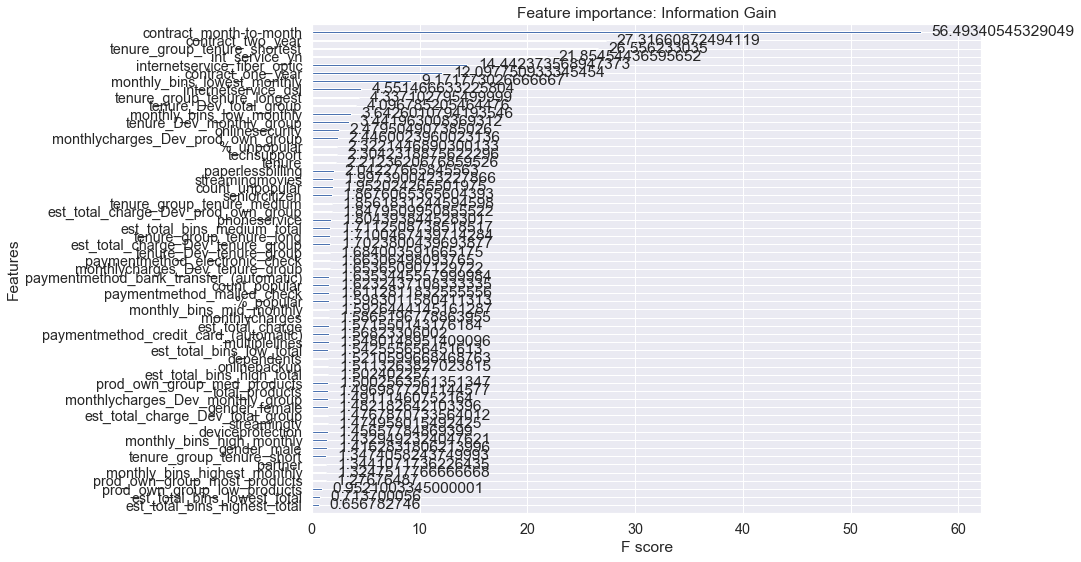

In [31]:
from xgboost import plot_importance

ax = plot_importance(xgb4, importance_type='gain', title='Feature importance: Information Gain')
fig = ax.figure
fig.set_size_inches(12, 9)




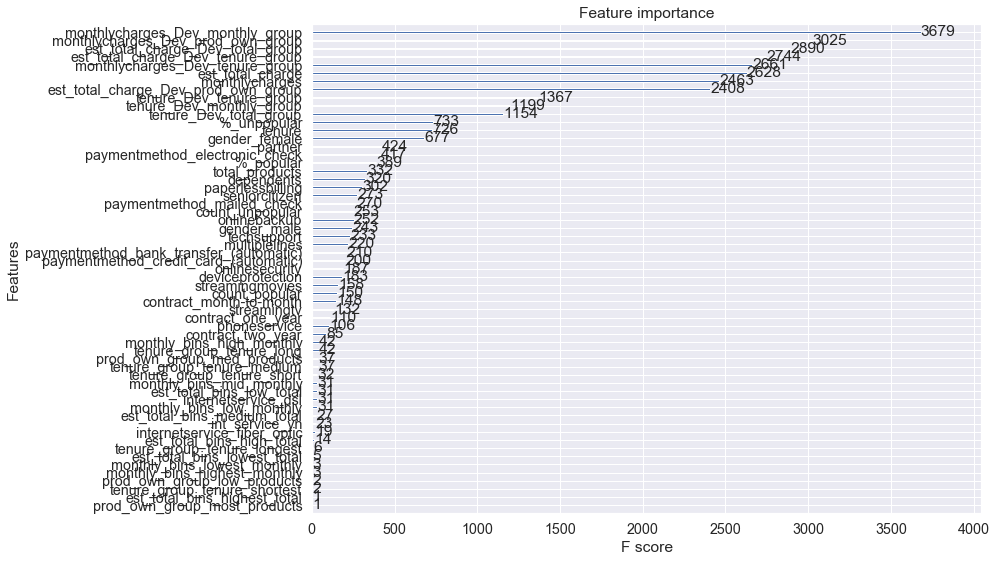

In [32]:
ax = plot_importance(xgb4)
fig = ax.figure
fig.set_size_inches(12, 9)

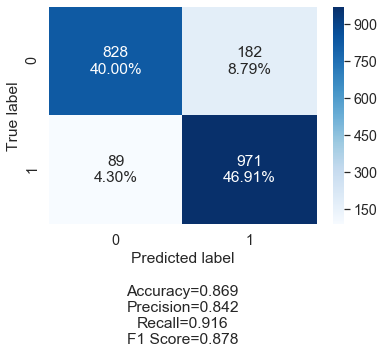

In [33]:
cm_XGB_test = confusion_matrix(y_test, xgb4.predict(X_test))
make_confusion_matrix(cm_XGB_test, percent=True, group_names=None)

In [36]:
#conda install graphviz python-graphviz



NameError: name 'library' is not defined

In [1]:
fig, ax = plt.subplots(figsize=(800, 600))
plot_tree(xgb4, num_trees=0, ax=ax, rankdir='LR')
plt.show()

#plt.savefig("tree.png")

#plot_tree(xgb4, num_trees=0, rankdir='LR')

NameError: name 'plt' is not defined

In [9]:
# REDOING FEATURE SELEC

# Feature ranking

feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(xgb4.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X_train.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: contract_month-to-month Importance: 0.20999999344348907
Variable: contract_two year    Importance: 0.10000000149011612
Variable: tenure_group_tenure_shortest Importance: 0.10000000149011612
Variable: int_service_yn       Importance: 0.07999999821186066
Variable: internetservice_fiber optic Importance: 0.05000000074505806
Variable: contract_one year    Importance: 0.05000000074505806
Variable: monthly_bins_lowest_monthly Importance: 0.029999999329447746
Variable: internetservice_dsl  Importance: 0.019999999552965164
Variable: tenure_group_tenure_longest Importance: 0.019999999552965164
Variable: tenure_Dev_total_group Importance: 0.019999999552965164
Variable: seniorcitizen        Importance: 0.009999999776482582
Variable: partner              Importance: 0.009999999776482582
Variable: dependents           Importance: 0.009999999776482582
Variable: tenure               Importance: 0.009999999776482582
Variable: phoneservice         Importance: 0.009999999776482582
Variable: mu

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

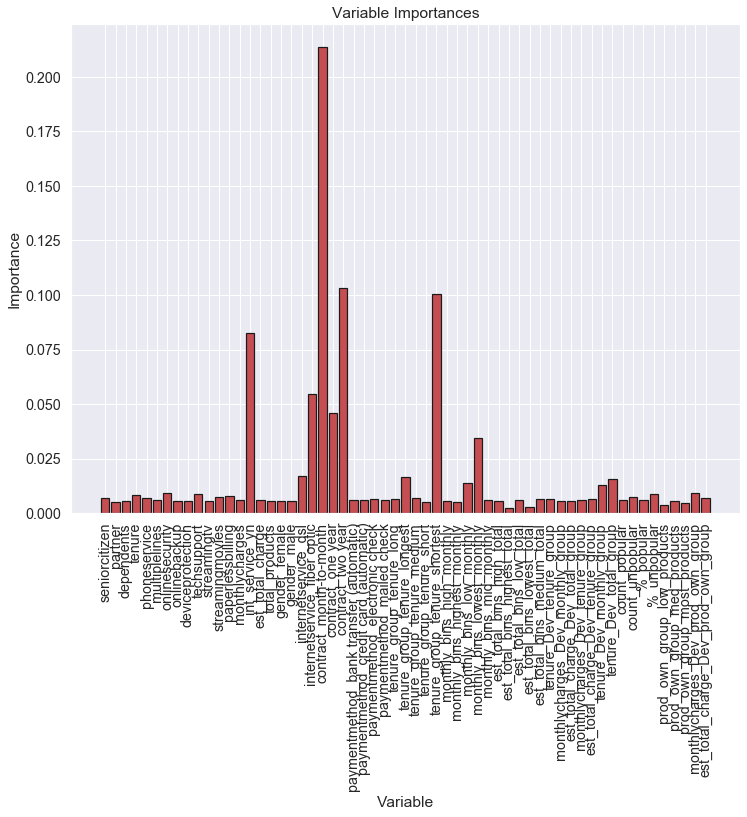

In [10]:
# list of x locations for plotting
x_values = list(range(len(importances)))
plt.figure(figsize=(12,9))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

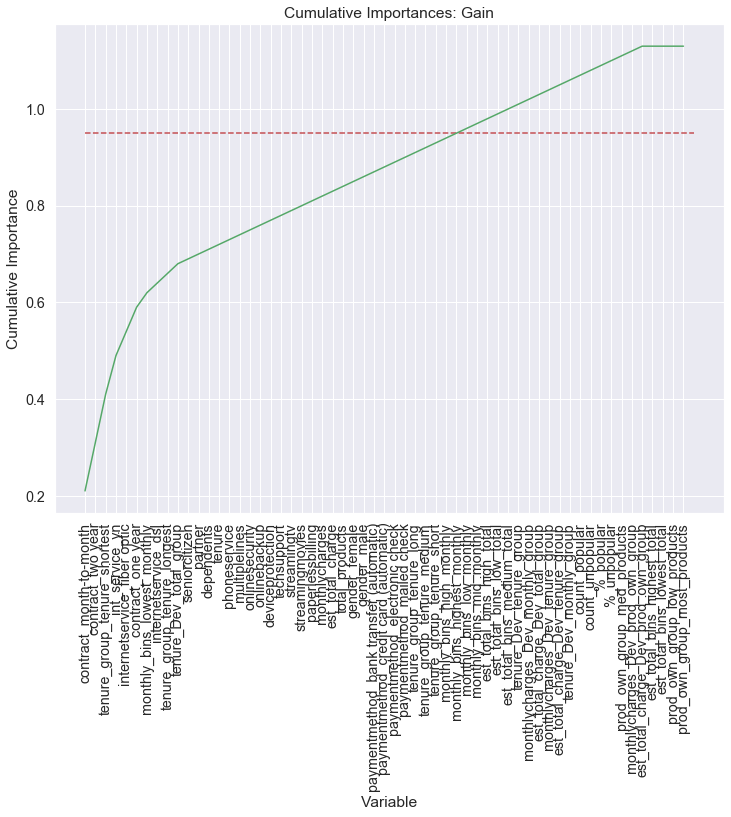

In [20]:
# New train data frame with no features that equal zero

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.figure(figsize=(12,9))
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances: Gain');

In [12]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 38


In [15]:
 #NEW TRAINING SET WITH FEATURE REDUCED!!!

# Extract the names of the most important features

important_feature_names = [feature[0] for feature in feature_importances[0:35]]

X_reduced_new = X[important_feature_names]

In [ ]:
# Redo on XGB MODEL WITH SMALLER FEATURE SET

In [16]:
ros = RandomOverSampler(random_state=0)
X_resampled_new, y_resampled_new = ros.fit_sample(X_reduced_new,y)

In [19]:
# FINAL STEP - REDUCE LEARNING RATE # maybe do again with scaling?

xgb5 = XGBClassifier(learning_rate =0.05, n_estimators=5000, max_depth=9,
    min_child_weight=3, gamma=0.4, subsample=0.9, colsample_bytree=0.6,
    objective= 'binary:logistic', nthread=4, seed=27, reg_alpha=0.001)

X_train, X_test, y_train, y_test = train_test_split(X_resampled_new, y_resampled_new, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)


eval_set=[(X_train,y_train),(X_val,y_val)]
xgb5fit = xgb5.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=True
                   )

xgb5pred = xgb5fit.predict(X_test)


accuracy1 = accuracy_score(y_test, xgb5fit.predict(X_test))
recall1 = recall_score(y_test, xgb5fit.predict(X_test))
precision1 = precision_score(y_test, xgb5fit.predict(X_test))
f11 = f1_score(y_test, xgb5fit.predict(X_test))
fbetax = fbeta_score(y_test, xgb5fit.predict(X_test), 2)

print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("recall: %.2f%%" % (recall1 * 100.0))
print("precision: %.2f%%" % (precision1 * 100.0))
print("f1: %.2f%%" % (f11 * 100.0))
print("fbeta2: %.2f%%" % (fbetax * 100.0))



[0]	validation_0-auc:0.867691	validation_1-auc:0.833976
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.8977	validation_1-auc:0.85757
[2]	validation_0-auc:0.903332	validation_1-auc:0.865038
[3]	validation_0-auc:0.908048	validation_1-auc:0.868659
[4]	validation_0-auc:0.910402	validation_1-auc:0.870479
[5]	validation_0-auc:0.912015	validation_1-auc:0.873182
[6]	validation_0-auc:0.913686	validation_1-auc:0.873639
[7]	validation_0-auc:0.914898	validation_1-auc:0.873785
[8]	validation_0-auc:0.914384	validation_1-auc:0.874602
[9]	validation_0-auc:0.915398	validation_1-auc:0.874753
[10]	validation_0-auc:0.916473	validation_1-auc:0.875535
[11]	validation_0-auc:0.917668	validation_1-auc:0.875854
[12]	validation_0-auc:0.919144	validation_1-auc:0.876734
[13]	validation_0-auc:0.920294	validation_1-auc:0.877832
[14]	validation_0-auc:0.921466	validation_1-auc:0.87804
[1

[141]	validation_0-auc:0.972321	validation_1-auc:0.901335
[142]	validation_0-auc:0.97244	validation_1-auc:0.901311
[143]	validation_0-auc:0.972531	validation_1-auc:0.901322
[144]	validation_0-auc:0.972597	validation_1-auc:0.901403
[145]	validation_0-auc:0.972616	validation_1-auc:0.901411
[146]	validation_0-auc:0.972916	validation_1-auc:0.901648
[147]	validation_0-auc:0.973037	validation_1-auc:0.9019
[148]	validation_0-auc:0.973106	validation_1-auc:0.901912
[149]	validation_0-auc:0.973259	validation_1-auc:0.901773
[150]	validation_0-auc:0.97338	validation_1-auc:0.9019
[151]	validation_0-auc:0.973682	validation_1-auc:0.90212
[152]	validation_0-auc:0.973861	validation_1-auc:0.902297
[153]	validation_0-auc:0.974095	validation_1-auc:0.902407
[154]	validation_0-auc:0.974139	validation_1-auc:0.902406
[155]	validation_0-auc:0.974246	validation_1-auc:0.902612
[156]	validation_0-auc:0.974435	validation_1-auc:0.902663
[157]	validation_0-auc:0.974678	validation_1-auc:0.902723
[158]	validation_0-au

[283]	validation_0-auc:0.986867	validation_1-auc:0.908224
[284]	validation_0-auc:0.986966	validation_1-auc:0.908371
[285]	validation_0-auc:0.986992	validation_1-auc:0.908385
[286]	validation_0-auc:0.987019	validation_1-auc:0.908378
[287]	validation_0-auc:0.987031	validation_1-auc:0.908428
[288]	validation_0-auc:0.987051	validation_1-auc:0.908473
[289]	validation_0-auc:0.98715	validation_1-auc:0.908553
[290]	validation_0-auc:0.987248	validation_1-auc:0.90858
[291]	validation_0-auc:0.987319	validation_1-auc:0.908571
[292]	validation_0-auc:0.987429	validation_1-auc:0.908634
[293]	validation_0-auc:0.987498	validation_1-auc:0.908697
[294]	validation_0-auc:0.987537	validation_1-auc:0.908632
[295]	validation_0-auc:0.987589	validation_1-auc:0.908657
[296]	validation_0-auc:0.987636	validation_1-auc:0.908779
[297]	validation_0-auc:0.987704	validation_1-auc:0.908719
[298]	validation_0-auc:0.987914	validation_1-auc:0.908902
[299]	validation_0-auc:0.98792	validation_1-auc:0.908961
[300]	validation_

[425]	validation_0-auc:0.993433	validation_1-auc:0.913561
[426]	validation_0-auc:0.993458	validation_1-auc:0.913646
[427]	validation_0-auc:0.993452	validation_1-auc:0.91366
[428]	validation_0-auc:0.993472	validation_1-auc:0.913638
[429]	validation_0-auc:0.993508	validation_1-auc:0.91363
[430]	validation_0-auc:0.99351	validation_1-auc:0.913591
[431]	validation_0-auc:0.993523	validation_1-auc:0.913527
[432]	validation_0-auc:0.993594	validation_1-auc:0.913599
[433]	validation_0-auc:0.993637	validation_1-auc:0.9137
[434]	validation_0-auc:0.993651	validation_1-auc:0.913685
[435]	validation_0-auc:0.993666	validation_1-auc:0.913686
[436]	validation_0-auc:0.993696	validation_1-auc:0.913691
[437]	validation_0-auc:0.993699	validation_1-auc:0.91364
[438]	validation_0-auc:0.993735	validation_1-auc:0.913776
[439]	validation_0-auc:0.993741	validation_1-auc:0.913795
[440]	validation_0-auc:0.993758	validation_1-auc:0.913916
[441]	validation_0-auc:0.993858	validation_1-auc:0.913864
[442]	validation_0-a

[567]	validation_0-auc:0.996551	validation_1-auc:0.916867
[568]	validation_0-auc:0.996561	validation_1-auc:0.916871
[569]	validation_0-auc:0.99657	validation_1-auc:0.916966
[570]	validation_0-auc:0.996596	validation_1-auc:0.916953
[571]	validation_0-auc:0.996605	validation_1-auc:0.916988
[572]	validation_0-auc:0.996633	validation_1-auc:0.917079
[573]	validation_0-auc:0.996646	validation_1-auc:0.917076
[574]	validation_0-auc:0.996657	validation_1-auc:0.917129
[575]	validation_0-auc:0.996653	validation_1-auc:0.917162
[576]	validation_0-auc:0.99666	validation_1-auc:0.91712
[577]	validation_0-auc:0.996691	validation_1-auc:0.91711
[578]	validation_0-auc:0.996688	validation_1-auc:0.917139
[579]	validation_0-auc:0.996689	validation_1-auc:0.91714
[580]	validation_0-auc:0.996693	validation_1-auc:0.91717
[581]	validation_0-auc:0.996704	validation_1-auc:0.917165
[582]	validation_0-auc:0.996705	validation_1-auc:0.917176
[583]	validation_0-auc:0.996723	validation_1-auc:0.917183
[584]	validation_0-a

[709]	validation_0-auc:0.998014	validation_1-auc:0.91877
[710]	validation_0-auc:0.998012	validation_1-auc:0.918764
[711]	validation_0-auc:0.998018	validation_1-auc:0.918814
[712]	validation_0-auc:0.998019	validation_1-auc:0.918811
[713]	validation_0-auc:0.998039	validation_1-auc:0.918873
[714]	validation_0-auc:0.998047	validation_1-auc:0.91886
[715]	validation_0-auc:0.998054	validation_1-auc:0.918882
[716]	validation_0-auc:0.998062	validation_1-auc:0.918895
[717]	validation_0-auc:0.998067	validation_1-auc:0.918917
[718]	validation_0-auc:0.998067	validation_1-auc:0.918903
[719]	validation_0-auc:0.998076	validation_1-auc:0.918989
[720]	validation_0-auc:0.998093	validation_1-auc:0.918978
[721]	validation_0-auc:0.9981	validation_1-auc:0.91893
[722]	validation_0-auc:0.998105	validation_1-auc:0.918869
[723]	validation_0-auc:0.998114	validation_1-auc:0.918882
[724]	validation_0-auc:0.998126	validation_1-auc:0.918819
[725]	validation_0-auc:0.998133	validation_1-auc:0.918925
[726]	validation_0-

[851]	validation_0-auc:0.998736	validation_1-auc:0.920179
[852]	validation_0-auc:0.998749	validation_1-auc:0.920188
[853]	validation_0-auc:0.998749	validation_1-auc:0.920173
[854]	validation_0-auc:0.998751	validation_1-auc:0.92016
[855]	validation_0-auc:0.99875	validation_1-auc:0.920187
[856]	validation_0-auc:0.998754	validation_1-auc:0.920186
[857]	validation_0-auc:0.998758	validation_1-auc:0.920228
[858]	validation_0-auc:0.998762	validation_1-auc:0.920211
[859]	validation_0-auc:0.998762	validation_1-auc:0.920116
[860]	validation_0-auc:0.998769	validation_1-auc:0.920108
[861]	validation_0-auc:0.998771	validation_1-auc:0.920143
[862]	validation_0-auc:0.998774	validation_1-auc:0.920183
[863]	validation_0-auc:0.99878	validation_1-auc:0.920243
[864]	validation_0-auc:0.998785	validation_1-auc:0.920279
[865]	validation_0-auc:0.998782	validation_1-auc:0.920243
[866]	validation_0-auc:0.998784	validation_1-auc:0.920306
[867]	validation_0-auc:0.998782	validation_1-auc:0.920245
[868]	validation_

In [22]:
xgb5.predict_proba(X_test)

array([[0.998718  , 0.00128198],
       [0.3681789 , 0.6318211 ],
       [0.09510696, 0.90489304],
       ...,
       [0.6189548 , 0.38104522],
       [0.14322978, 0.8567702 ],
       [0.94458467, 0.05541535]], dtype=float32)